In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from data_cube import DataCube
from ssm import SSM
from snf2 import SNF

In [2]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


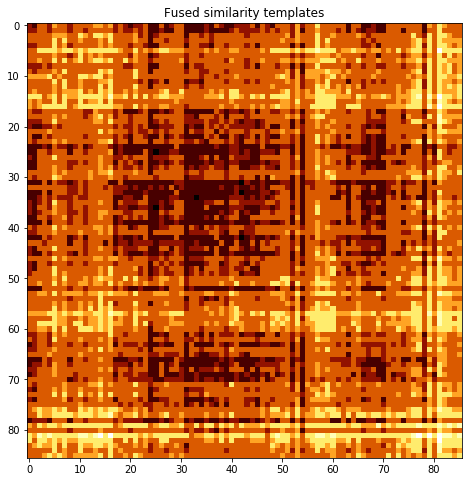

subject 30; gesture 1_1_1


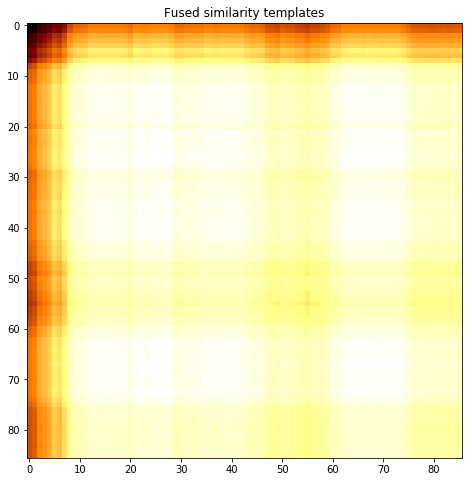

subject 30; gesture 1_0_1


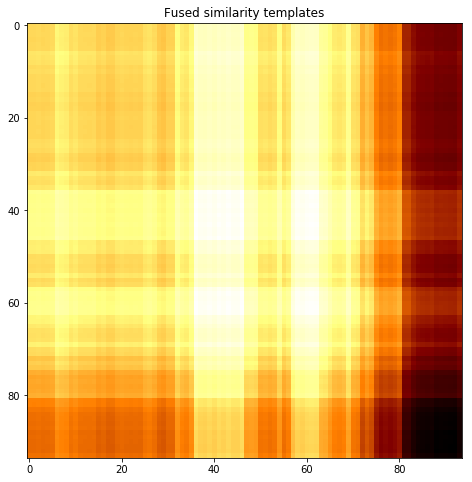

subject 30; gesture 1_0_2


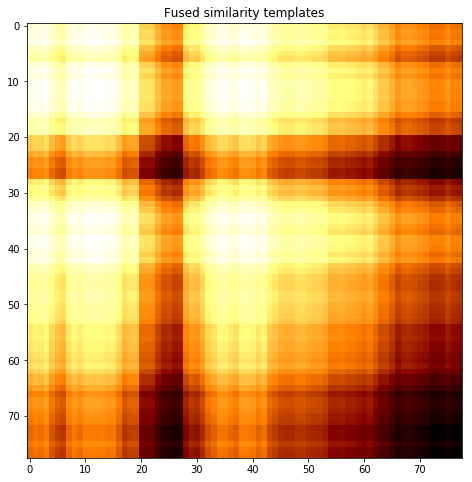

subject 06; gesture 1_1_2


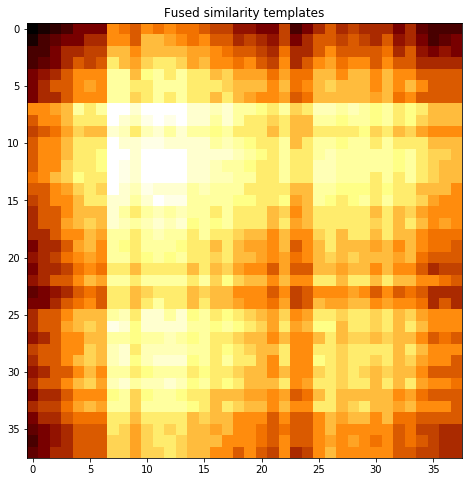

subject 06; gesture 1_1_1


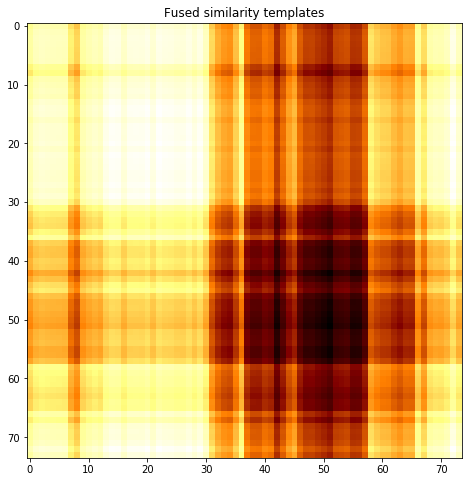

subject 06; gesture 1_0_1


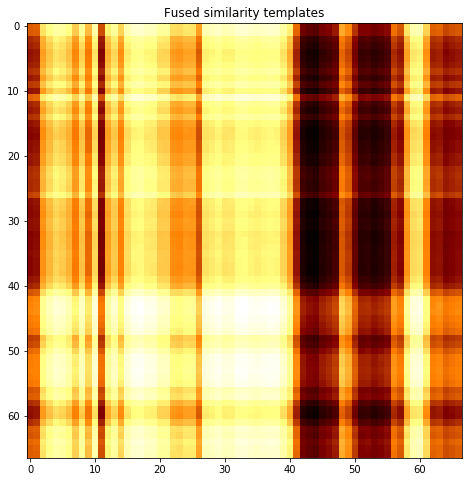

subject 06; gesture 1_0_2


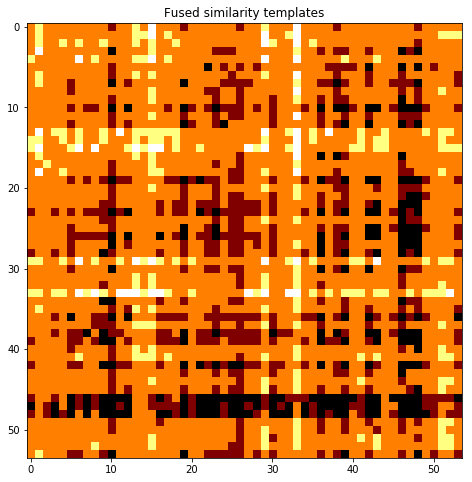

subject 09; gesture 1_1_2


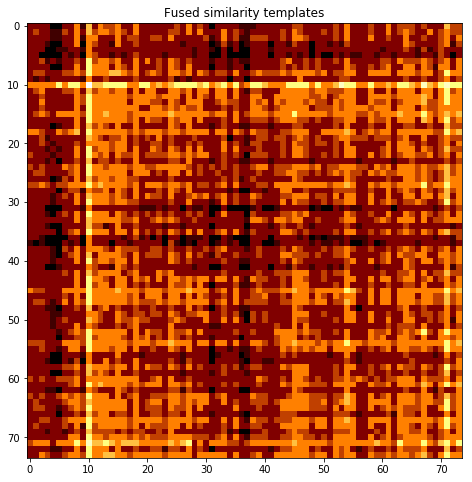

subject 09; gesture 1_1_1


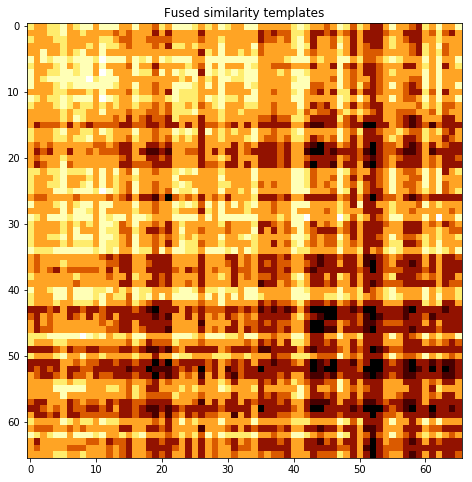

subject 09; gesture 1_0_1


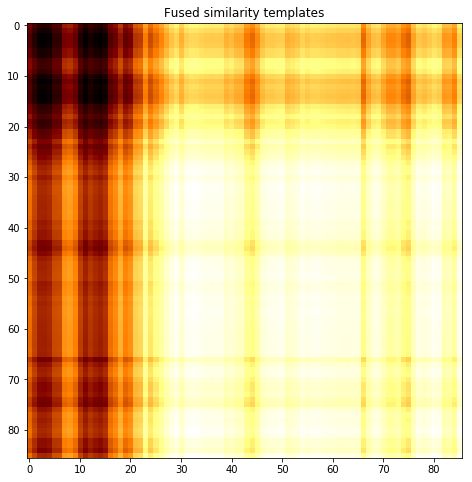

subject 09; gesture 1_0_2


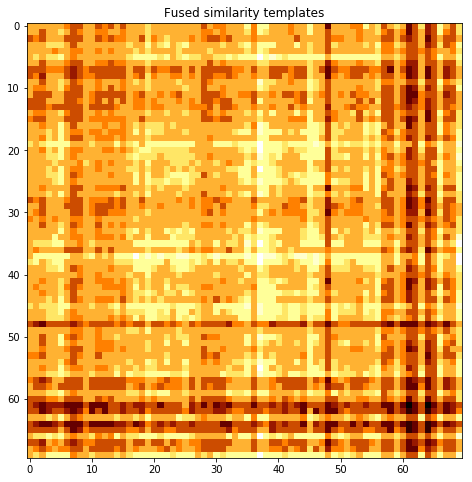

subject 03; gesture 1_1_2


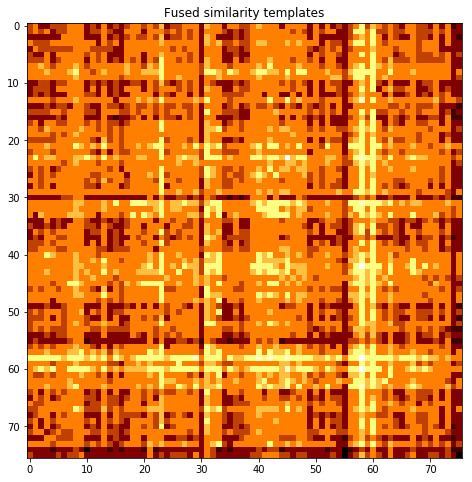

subject 03; gesture 1_1_1


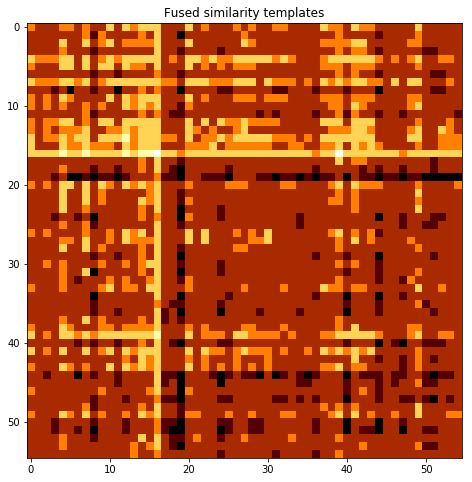

subject 03; gesture 1_0_1


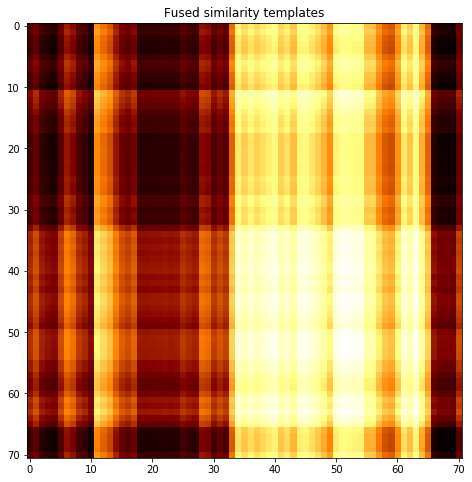

subject 03; gesture 1_0_2


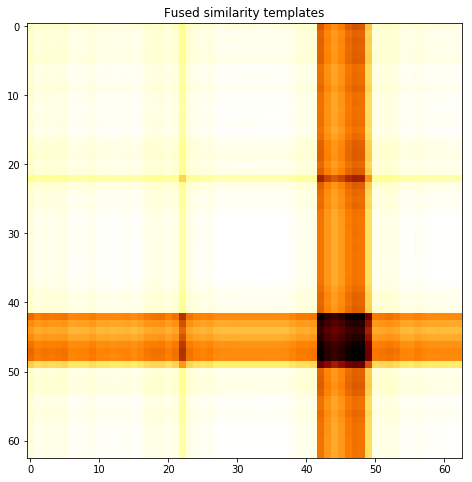

subject 05; gesture 1_1_2


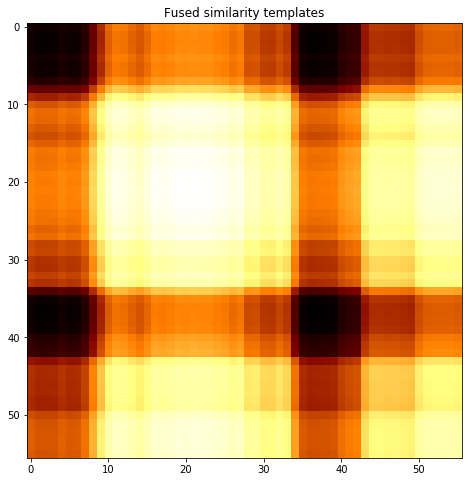

subject 05; gesture 1_1_1


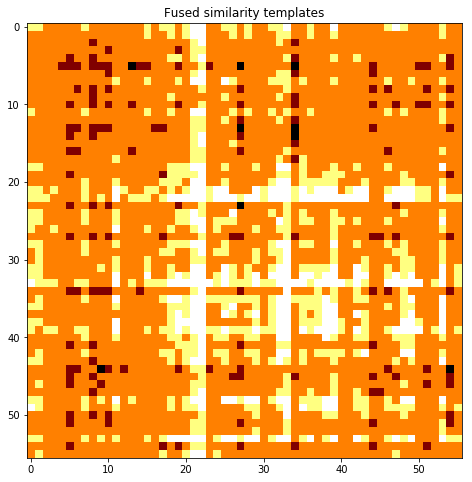

subject 05; gesture 1_0_1


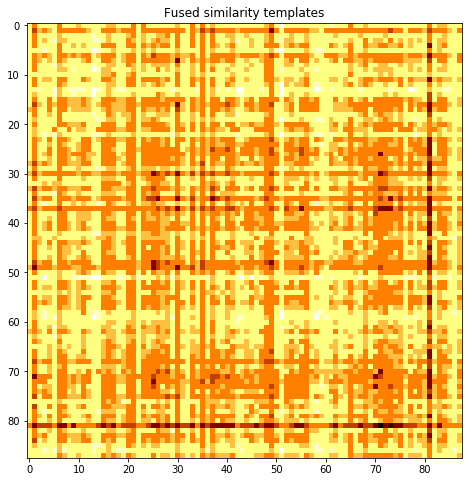

subject 05; gesture 1_0_2


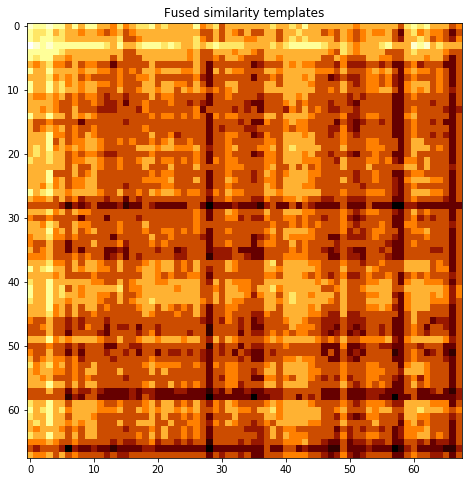

subject 21; gesture 1_1_2


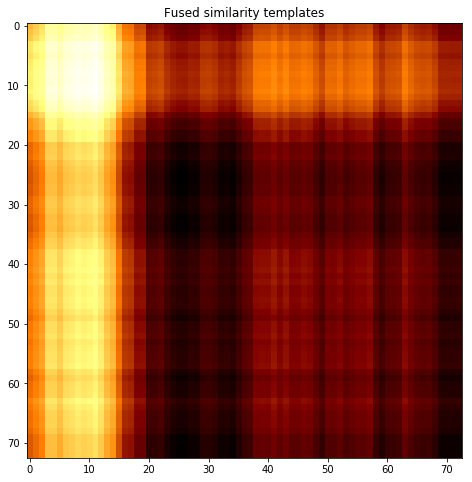

subject 21; gesture 1_1_1


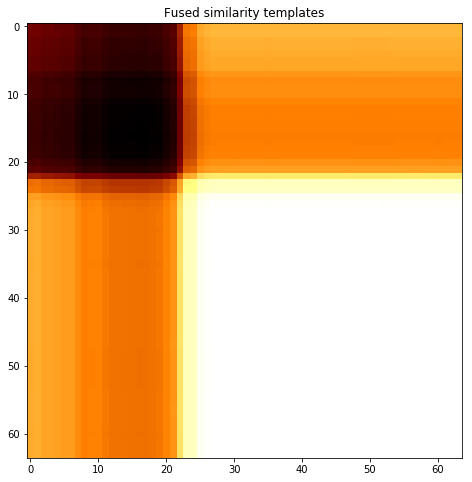

subject 21; gesture 1_0_1


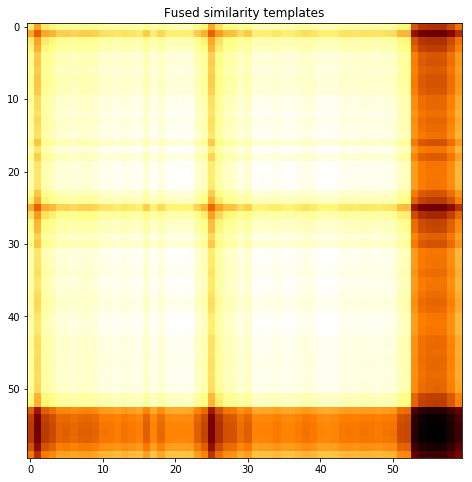

subject 21; gesture 1_0_2


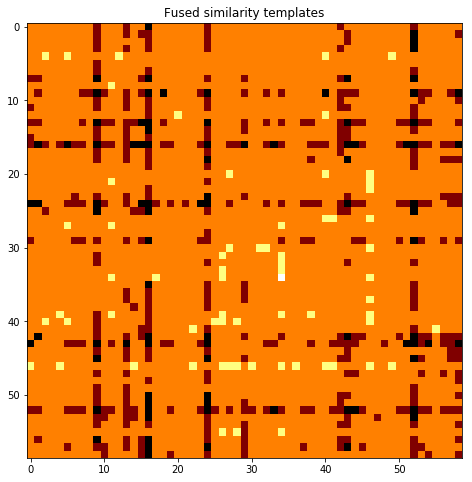

subject 17; gesture 1_1_2


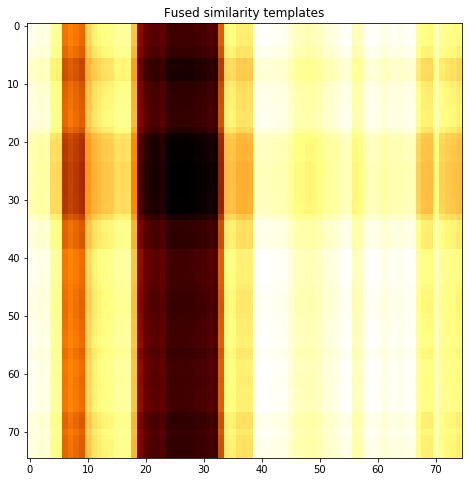

subject 17; gesture 1_1_1


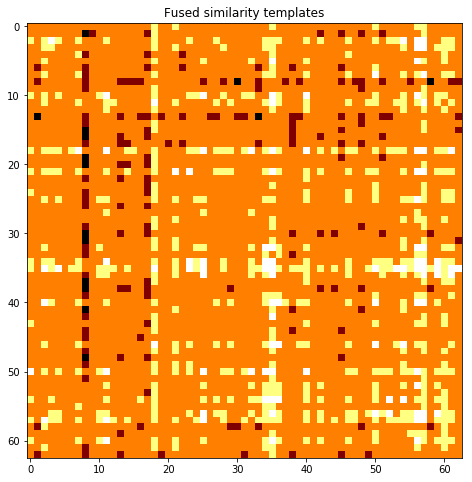

subject 17; gesture 1_0_1


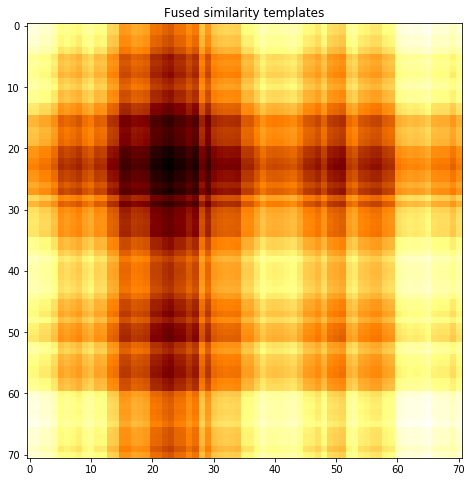

subject 17; gesture 1_0_2


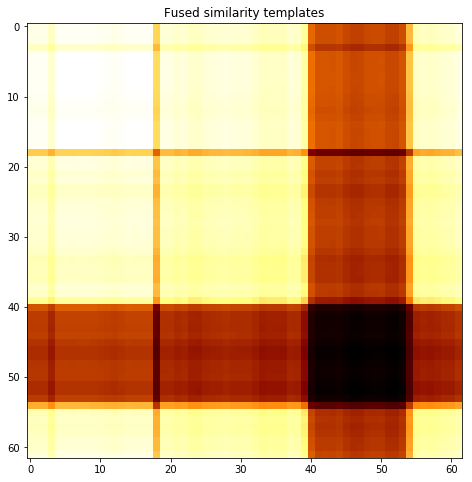

subject 01; gesture 1_1_2


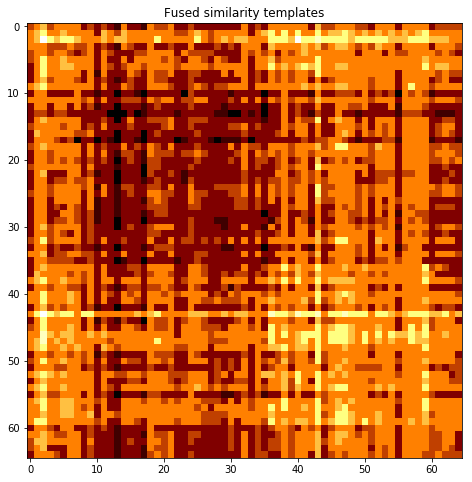

subject 01; gesture 1_1_1


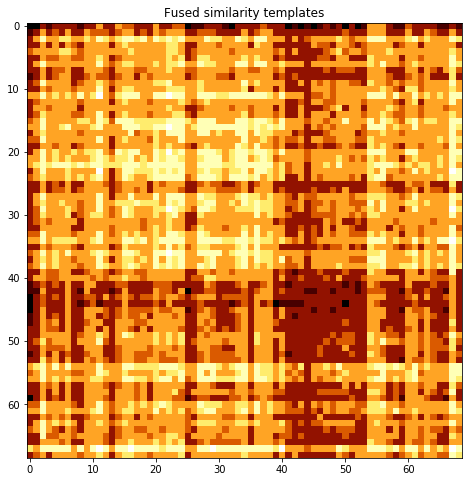

subject 01; gesture 1_0_1


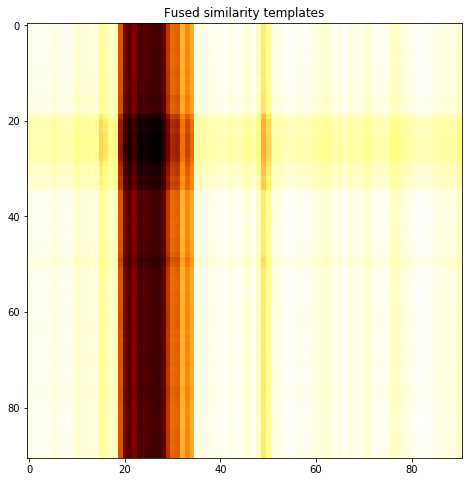

subject 01; gesture 1_0_2


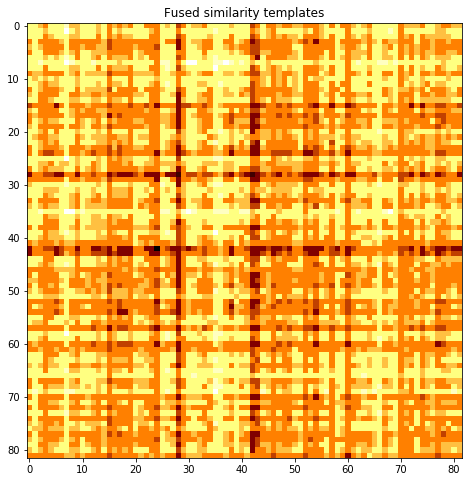

subject 16; gesture 1_1_2


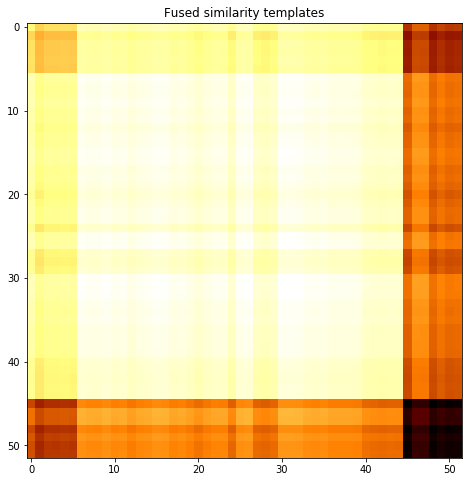

subject 16; gesture 1_1_1


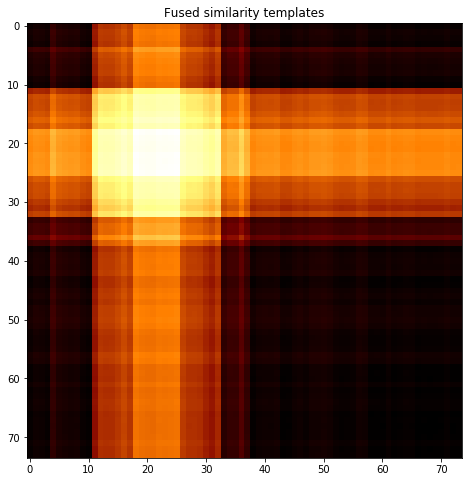

subject 16; gesture 1_0_1


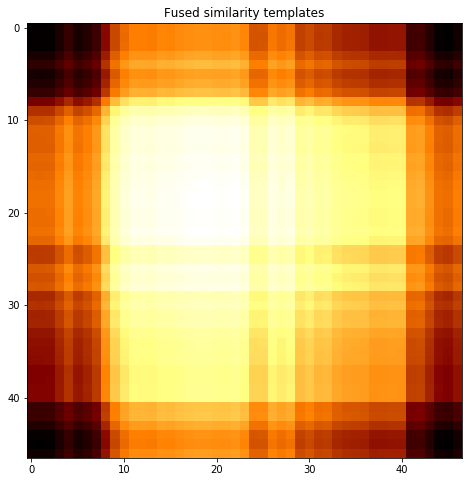

subject 16; gesture 1_0_2


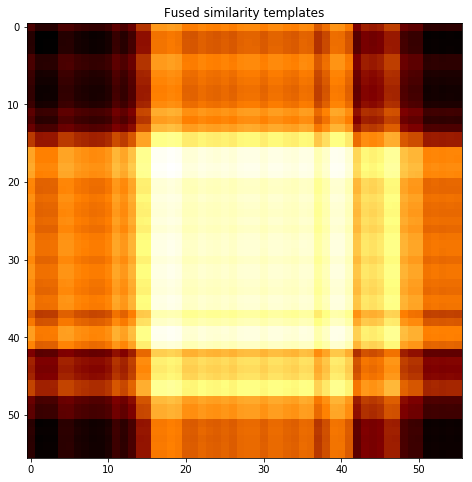

subject 26; gesture 1_1_2


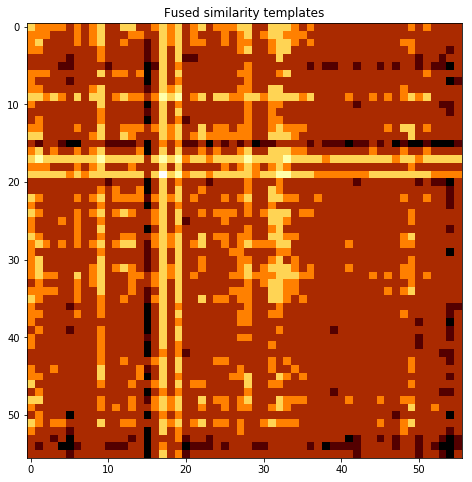

subject 26; gesture 1_1_1


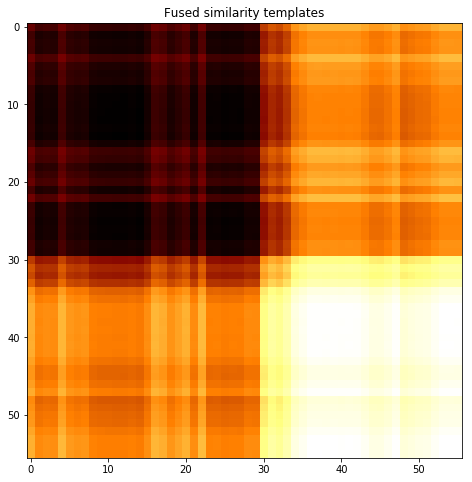

subject 26; gesture 1_0_1


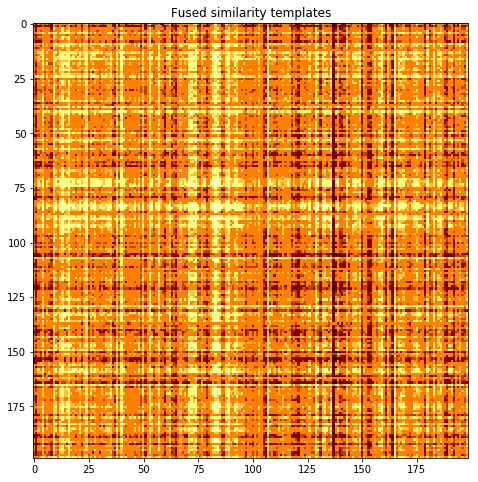

subject 26; gesture 1_0_2


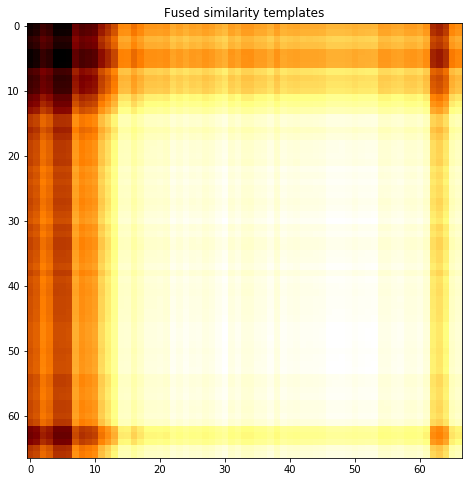

subject 32; gesture 1_1_2


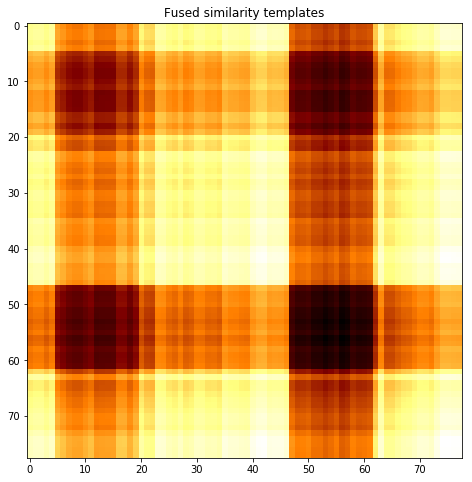

subject 32; gesture 1_1_1


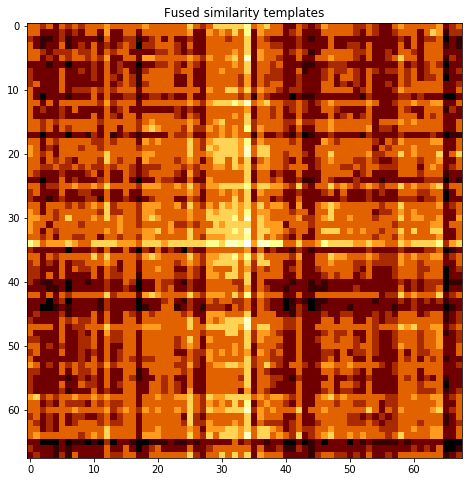

subject 32; gesture 1_0_1


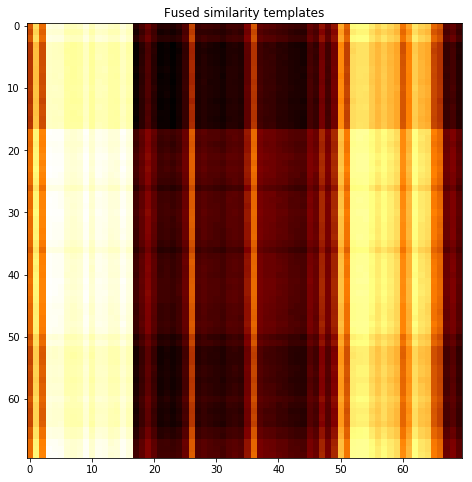

subject 32; gesture 1_0_2


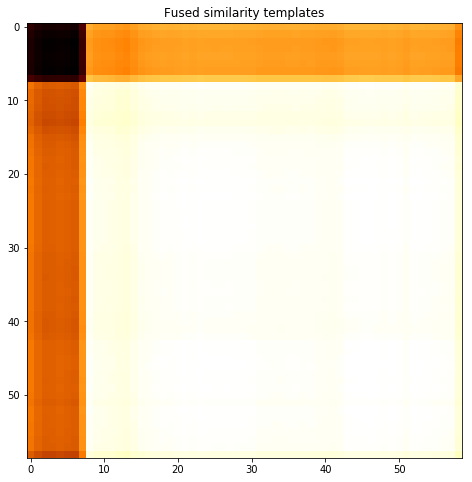

subject 04; gesture 1_1_2


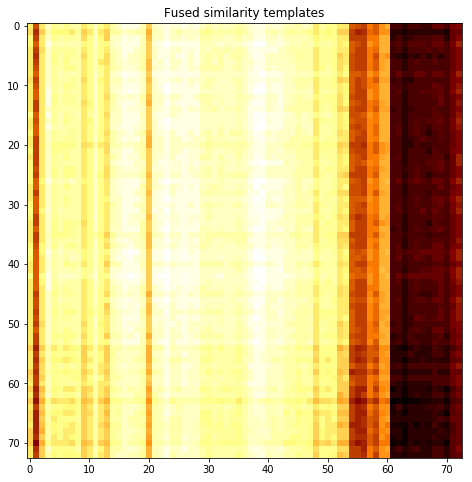

subject 04; gesture 1_1_1


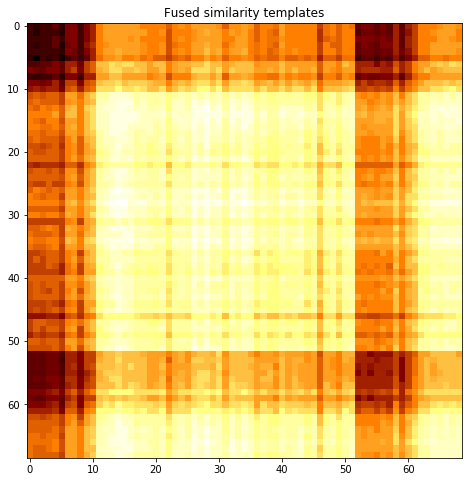

subject 04; gesture 1_0_1


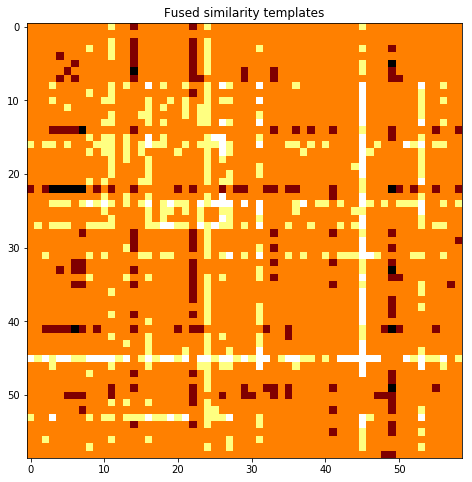

subject 04; gesture 1_0_2


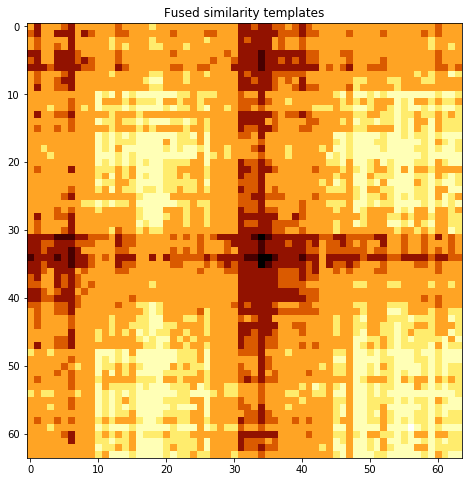

subject 08; gesture 1_1_2


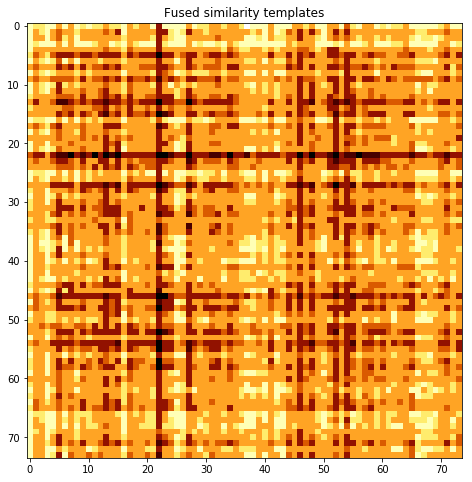

subject 08; gesture 1_1_1


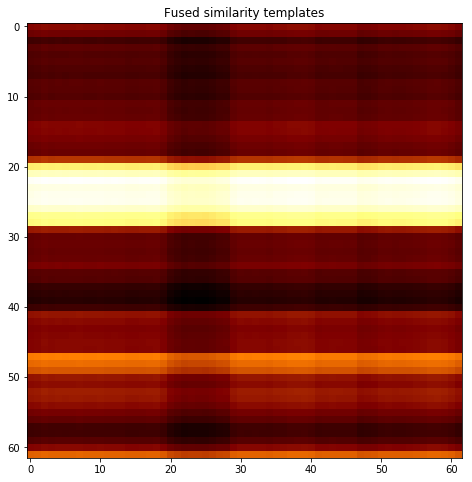

subject 08; gesture 1_0_1


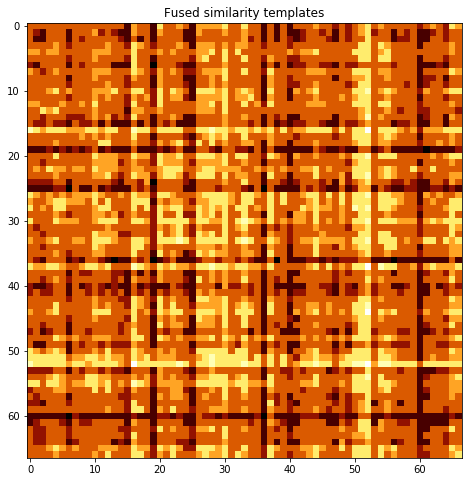

subject 08; gesture 1_0_2


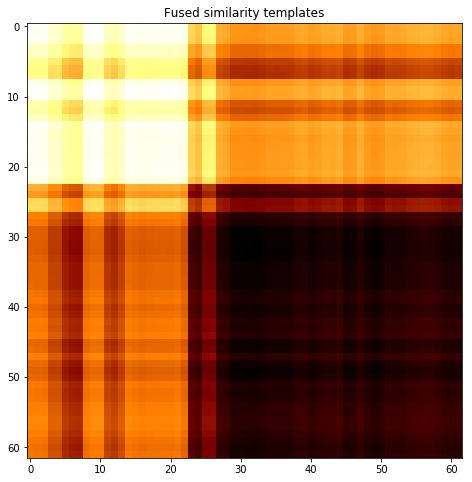

subject 27; gesture 1_1_2


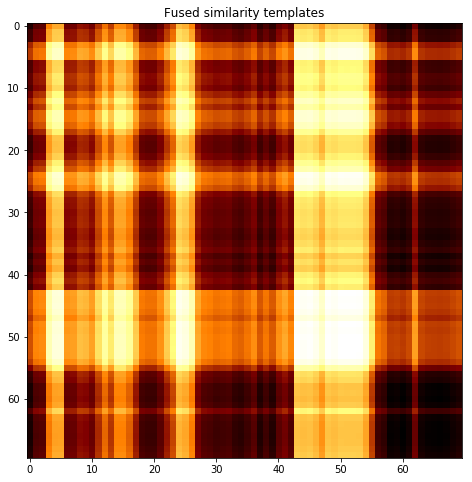

subject 27; gesture 1_1_1


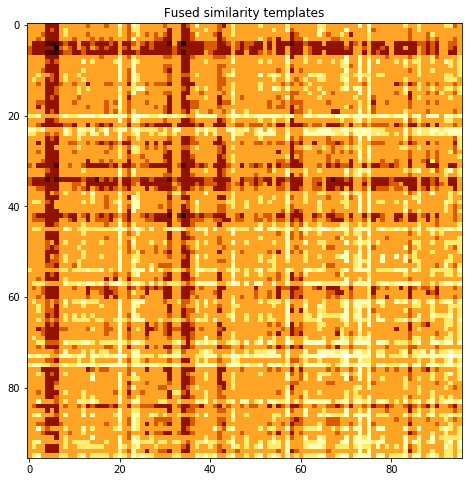

subject 27; gesture 1_0_1


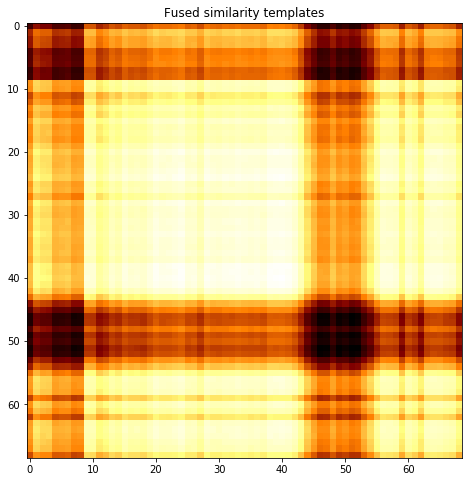

subject 27; gesture 1_0_2


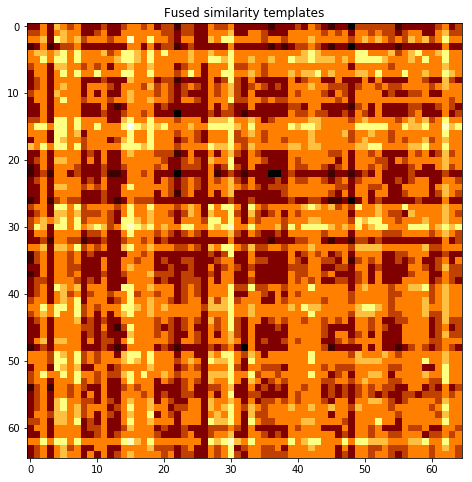

subject 14; gesture 1_1_2


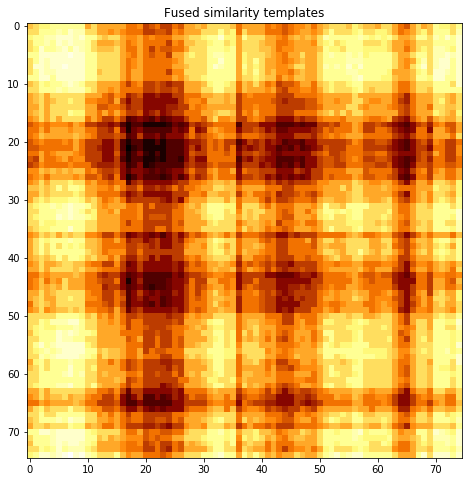

subject 14; gesture 1_1_1


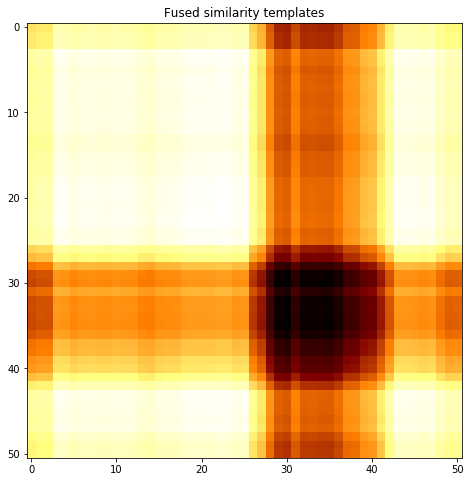

subject 14; gesture 1_0_1


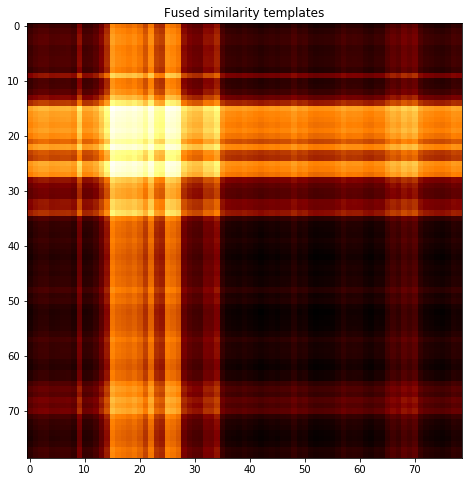

subject 14; gesture 1_0_2


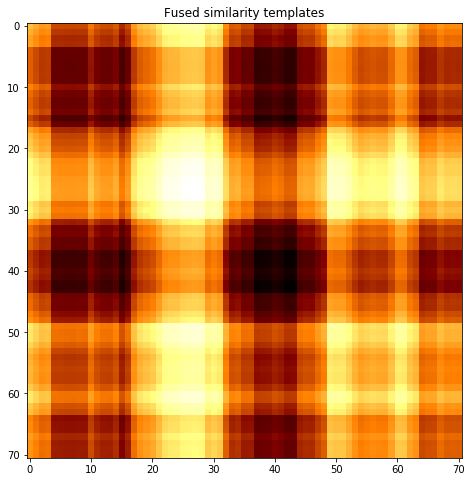

subject 23; gesture 1_1_2


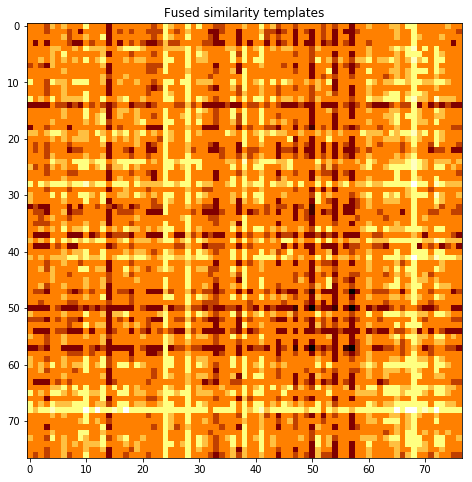

subject 23; gesture 1_1_1


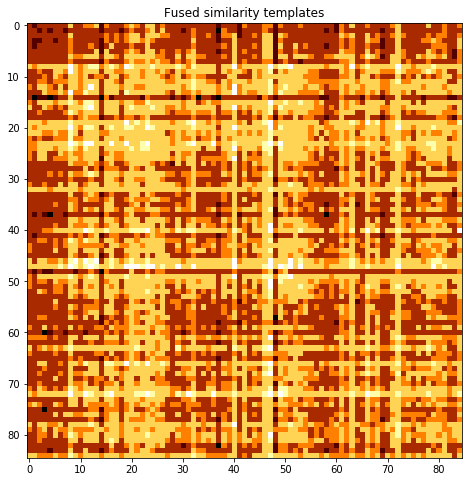

subject 23; gesture 1_0_1


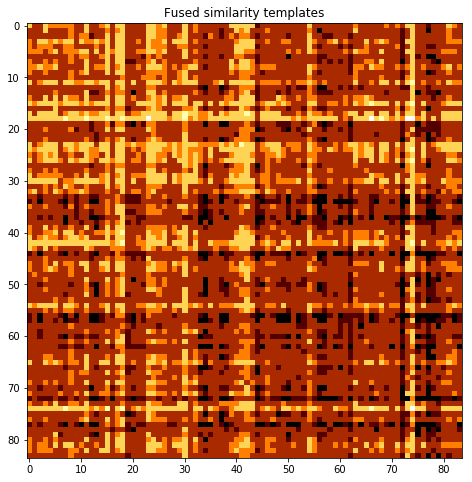

subject 23; gesture 1_0_2


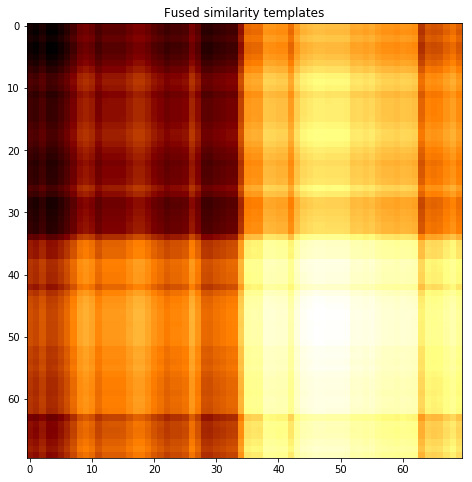

subject 25; gesture 1_1_2


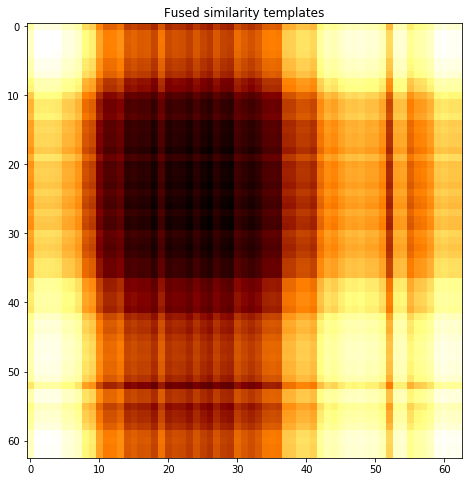

subject 25; gesture 1_1_1


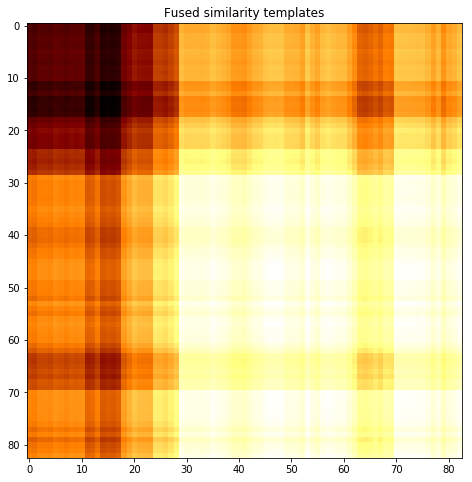

subject 25; gesture 1_0_1


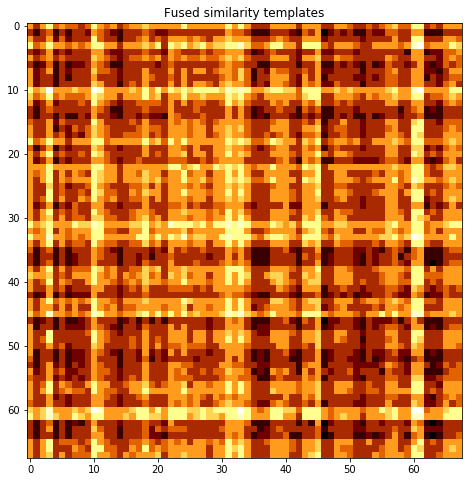

subject 25; gesture 1_0_2


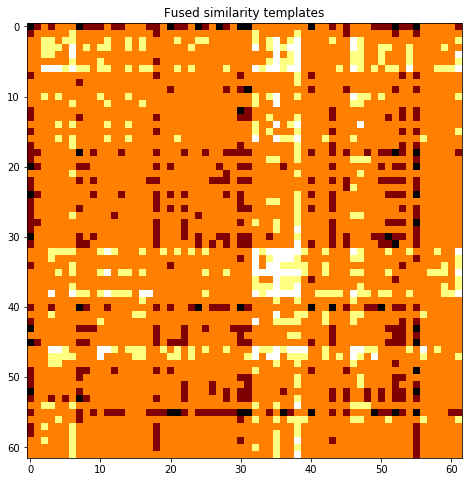

subject 18; gesture 1_1_2


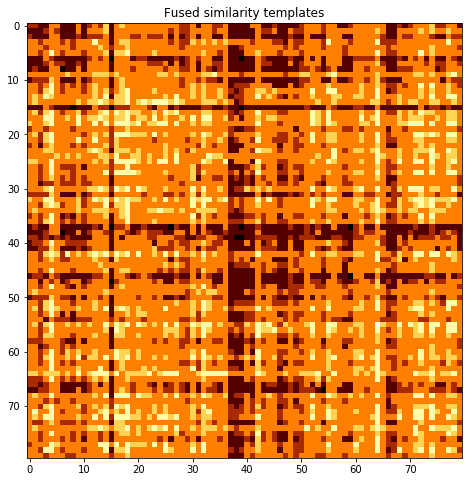

subject 18; gesture 1_1_1


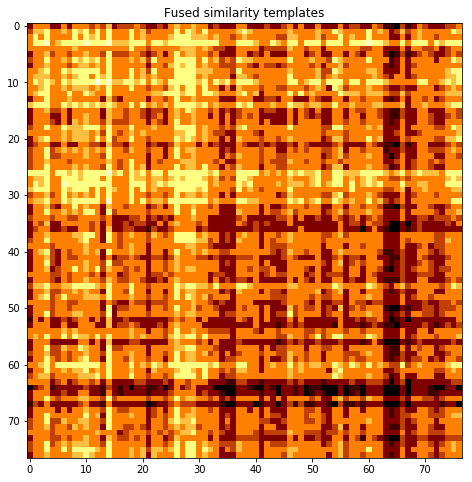

subject 18; gesture 1_0_1


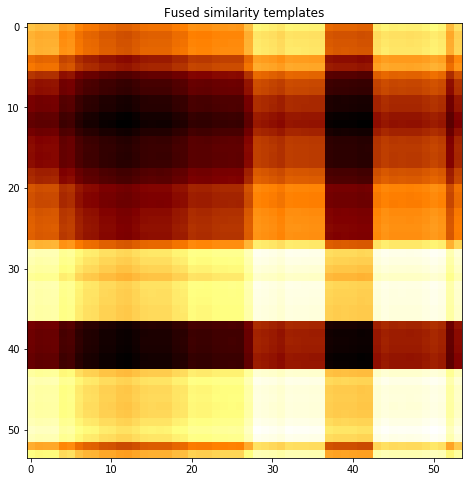

subject 18; gesture 1_0_2


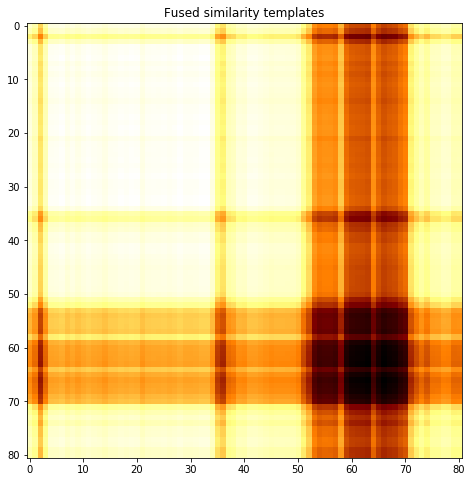

subject 29; gesture 1_1_2


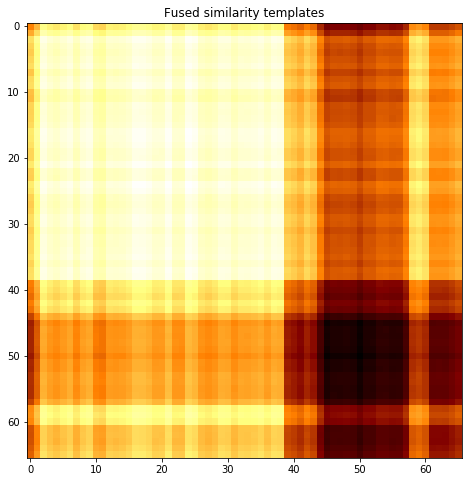

subject 29; gesture 1_1_1


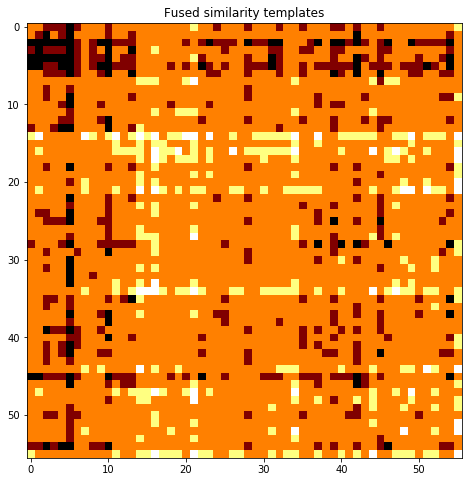

subject 29; gesture 1_0_1


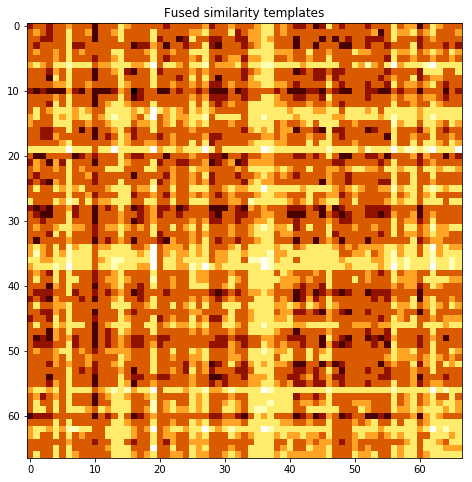

subject 29; gesture 1_0_2


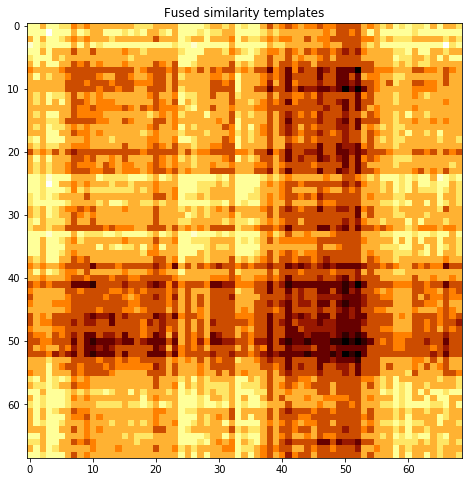

subject 15; gesture 1_1_2


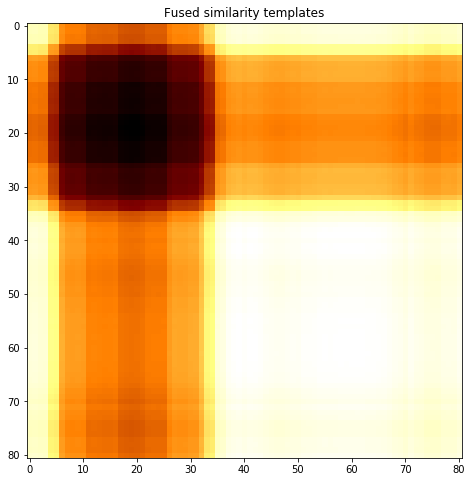

subject 15; gesture 1_1_1


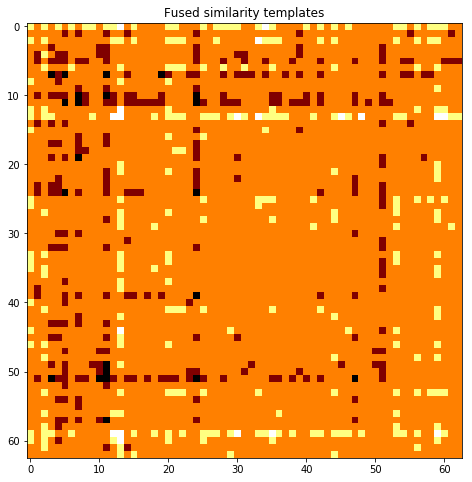

subject 15; gesture 1_0_1


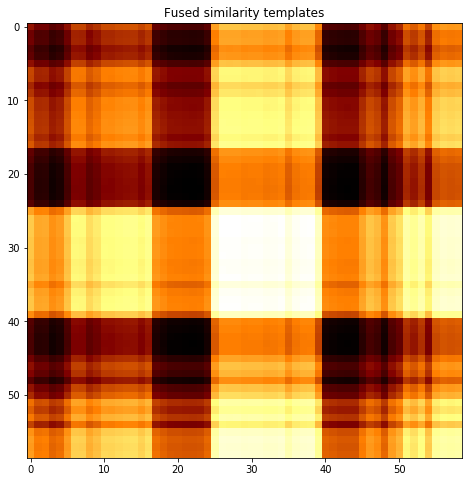

subject 15; gesture 1_0_2


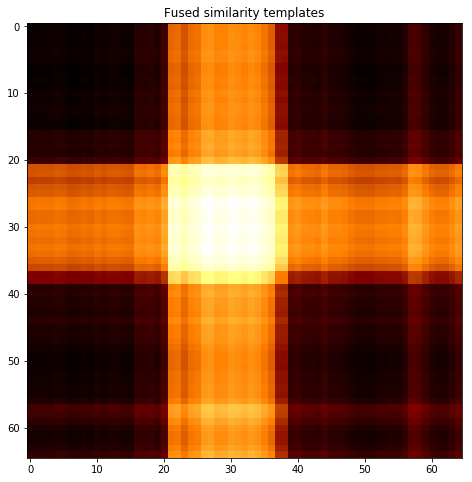

subject 28; gesture 1_1_2


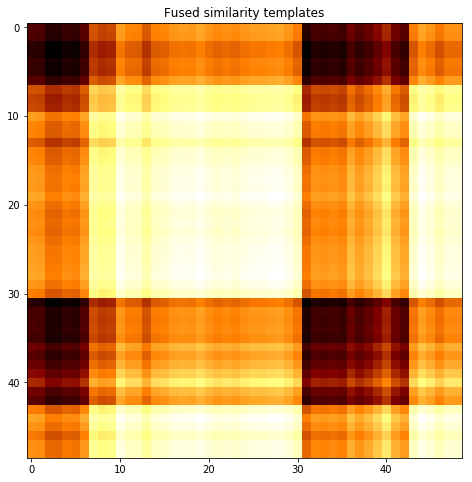

subject 28; gesture 1_1_1


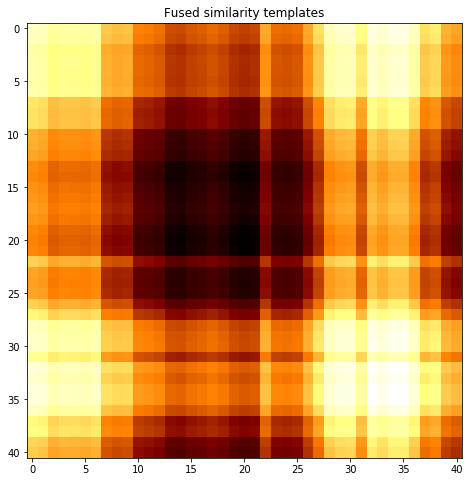

subject 28; gesture 1_0_1


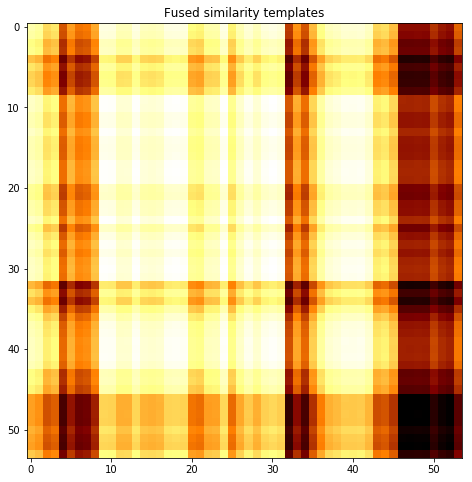

subject 28; gesture 1_0_2


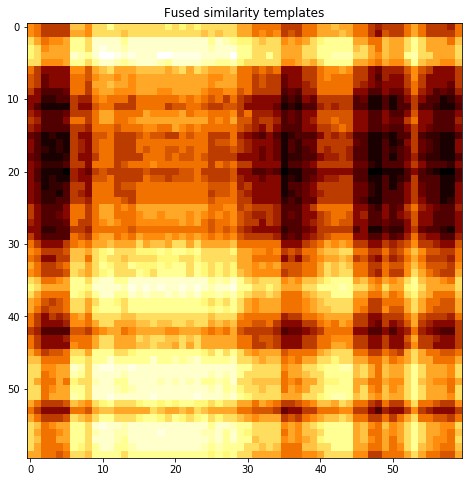

subject 12; gesture 1_1_2


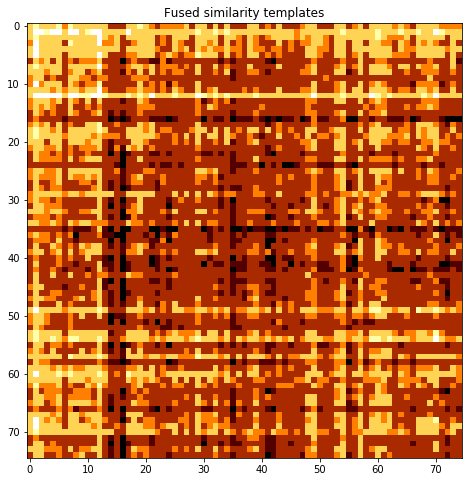

subject 12; gesture 1_1_1


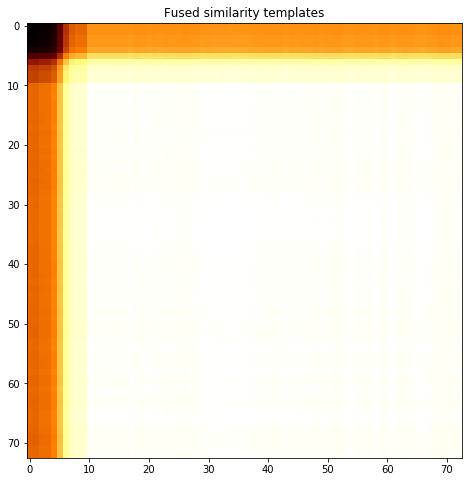

subject 12; gesture 1_0_1


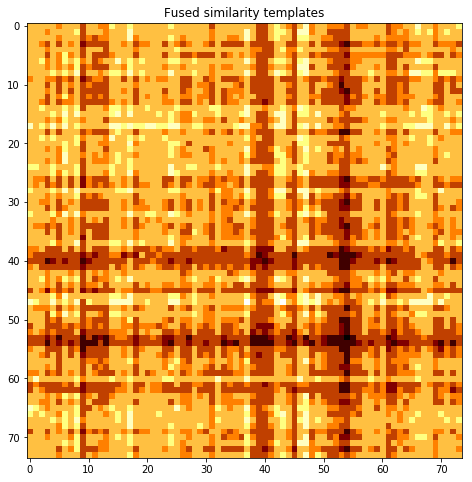

subject 12; gesture 1_0_2


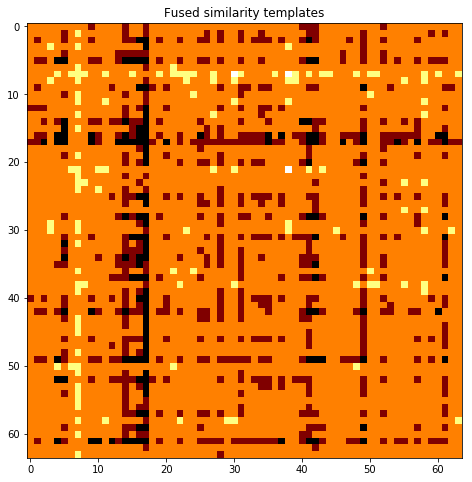

subject 19; gesture 1_1_2


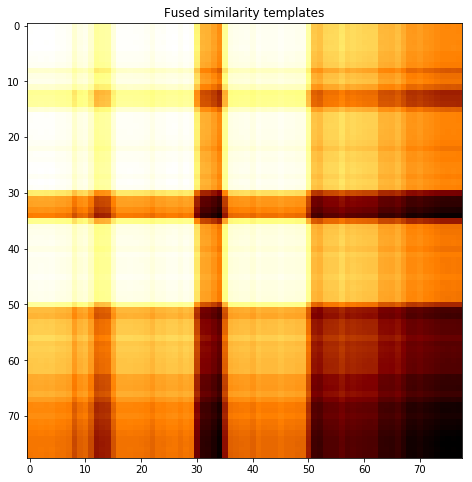

subject 19; gesture 1_1_1


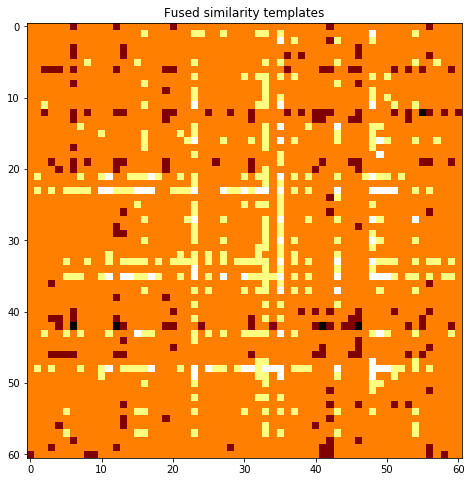

subject 19; gesture 1_0_1


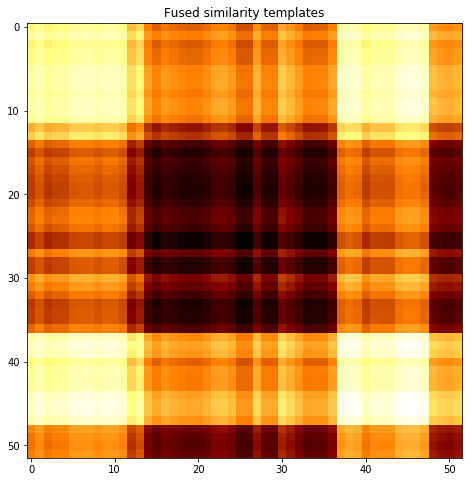

subject 19; gesture 1_0_2


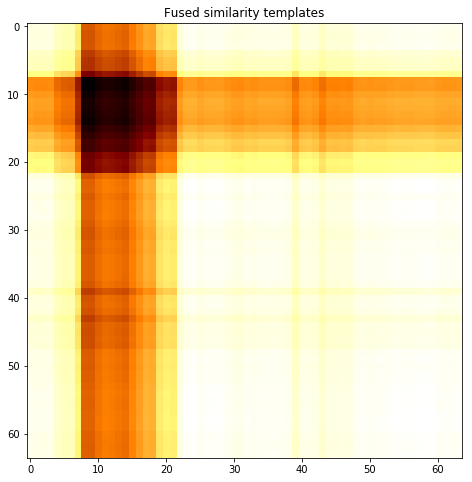

subject 07; gesture 1_1_2


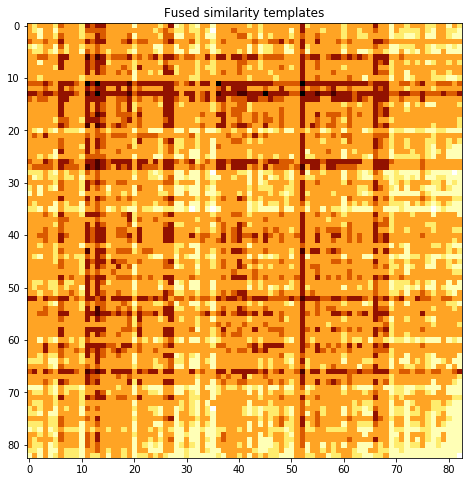

subject 07; gesture 1_1_1


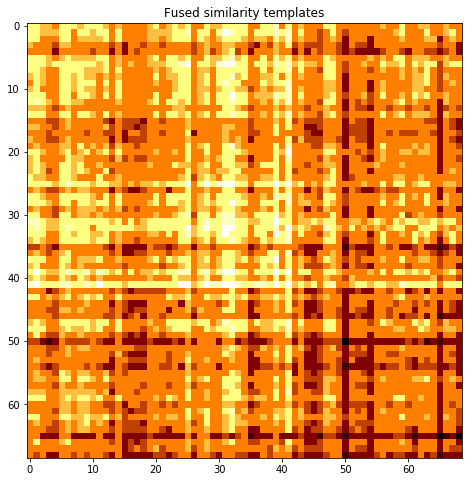

subject 07; gesture 1_0_1


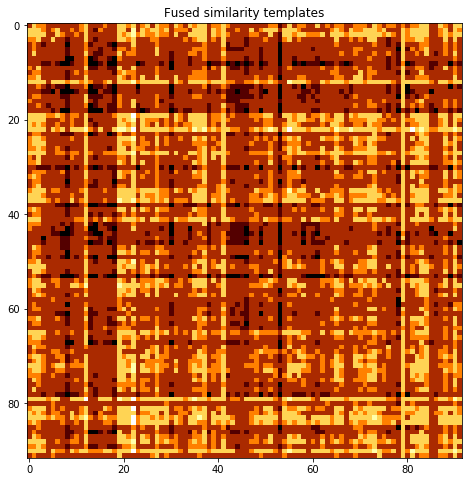

subject 07; gesture 1_0_2


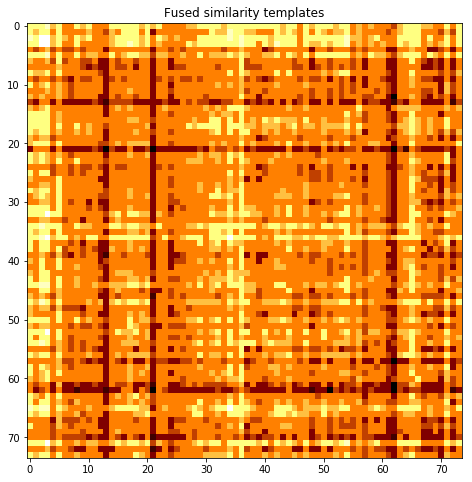

subject 20; gesture 1_1_2


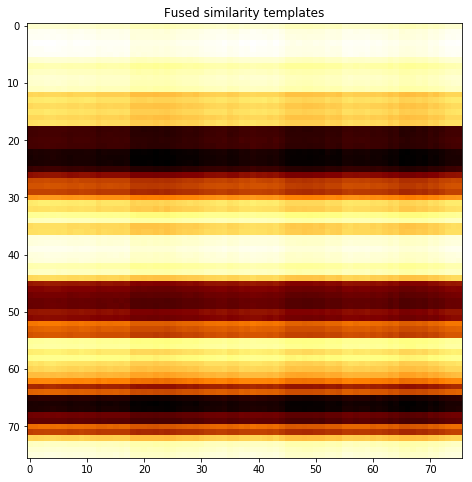

subject 20; gesture 1_1_1


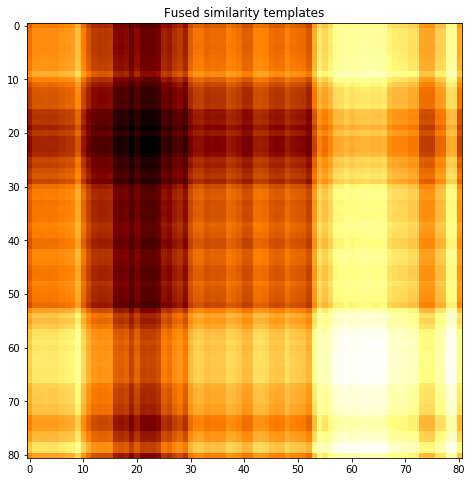

subject 20; gesture 1_0_1


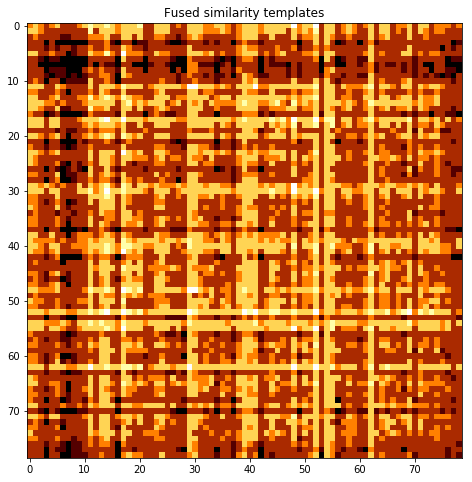

subject 20; gesture 1_0_2


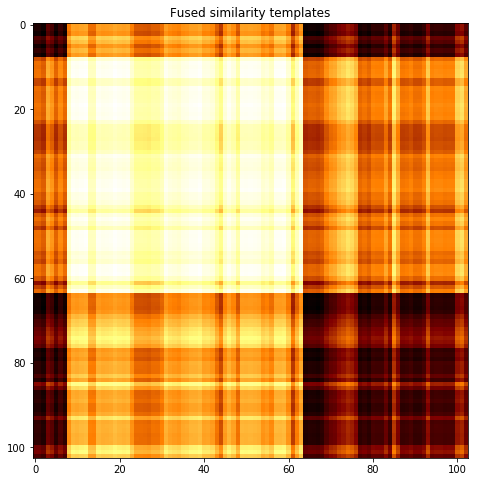

subject 31; gesture 1_1_2


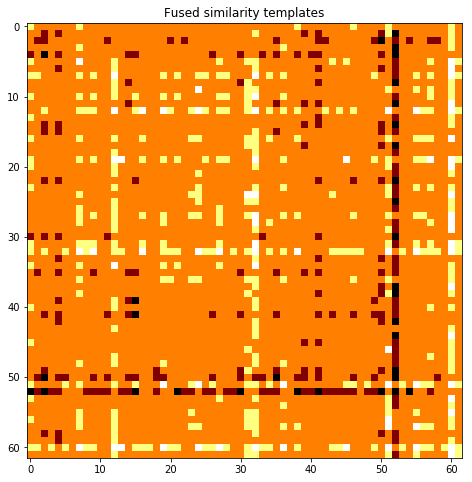

subject 31; gesture 1_1_1


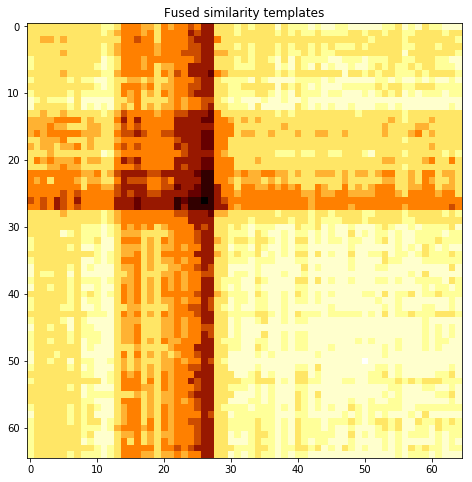

subject 31; gesture 1_0_1


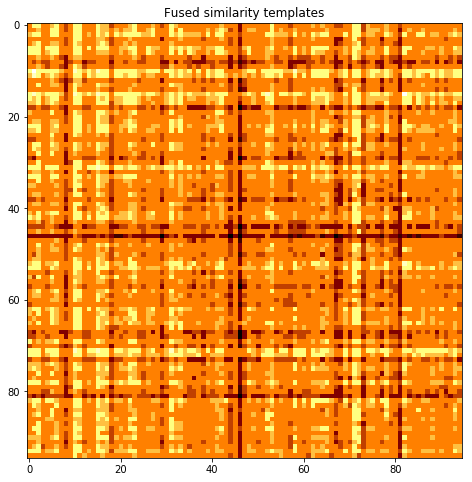

subject 31; gesture 1_0_2


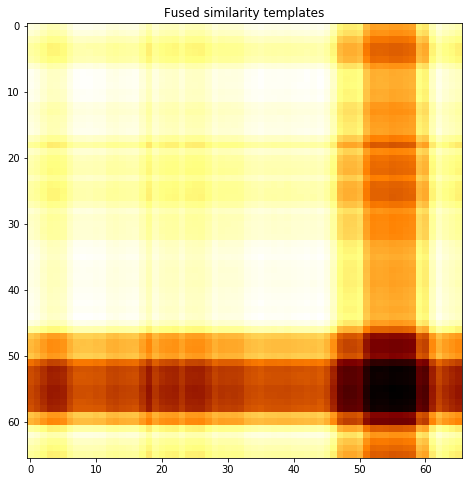

subject 13; gesture 1_1_2


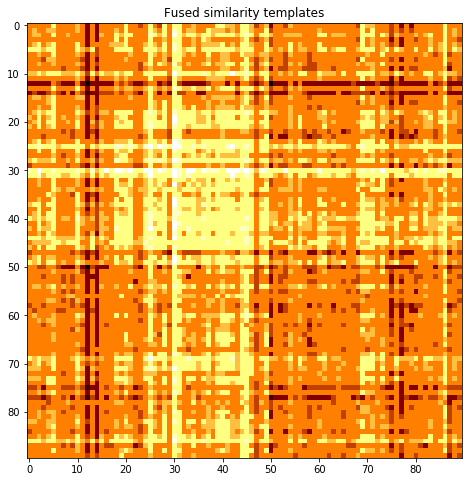

subject 13; gesture 1_1_1


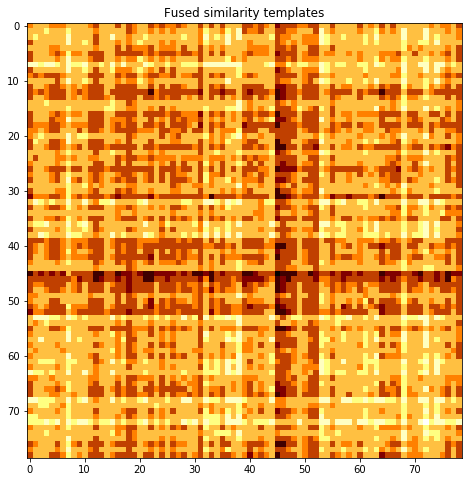

subject 13; gesture 1_0_1


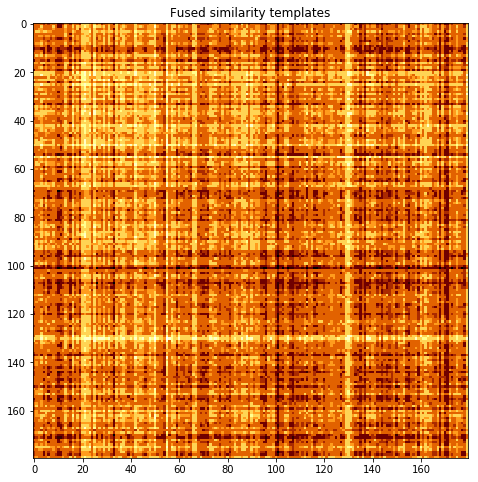

subject 13; gesture 1_0_2


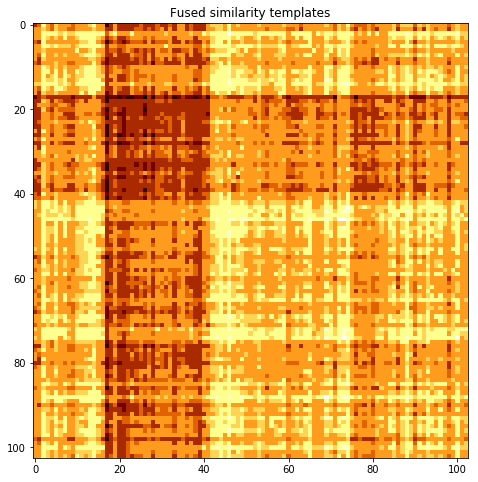

subject 36; gesture 1_1_2


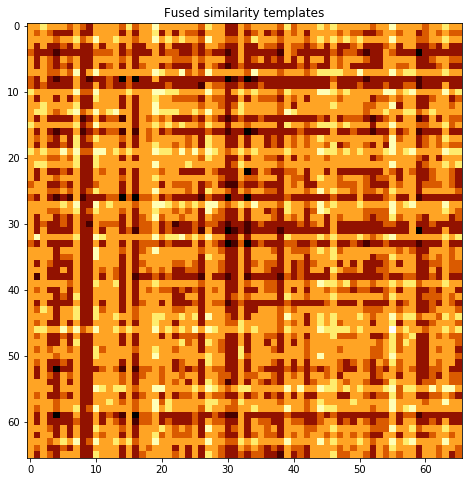

subject 36; gesture 1_1_1


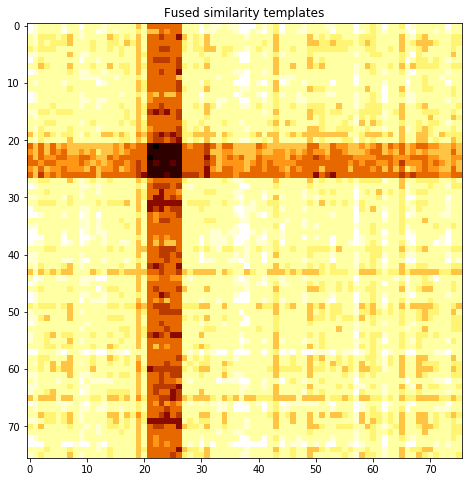

subject 36; gesture 1_0_1


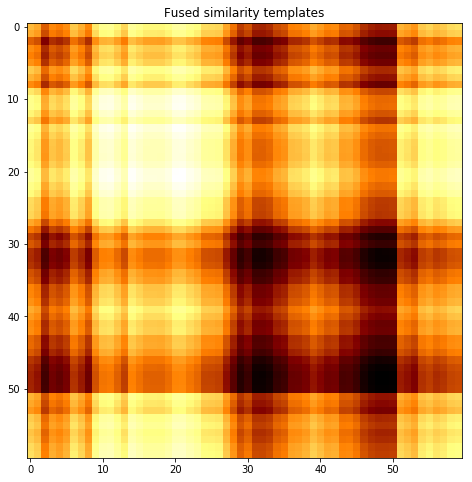

subject 36; gesture 1_0_2


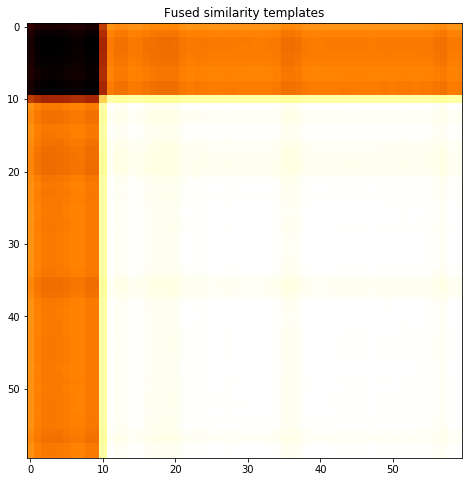

subject 24; gesture 1_1_2


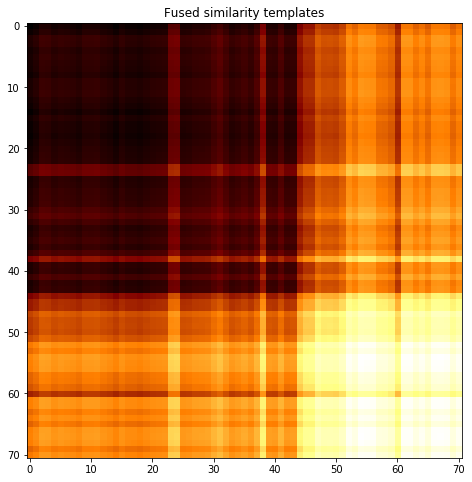

subject 24; gesture 1_1_1


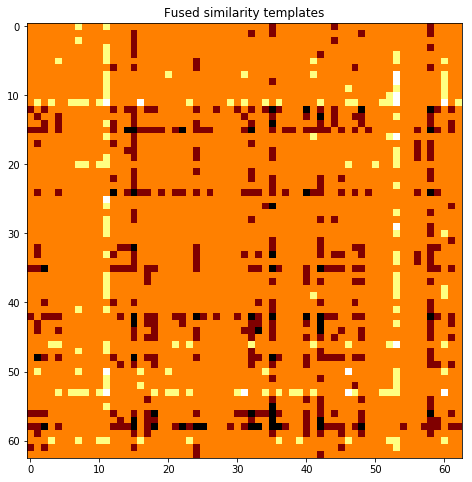

subject 24; gesture 1_0_1


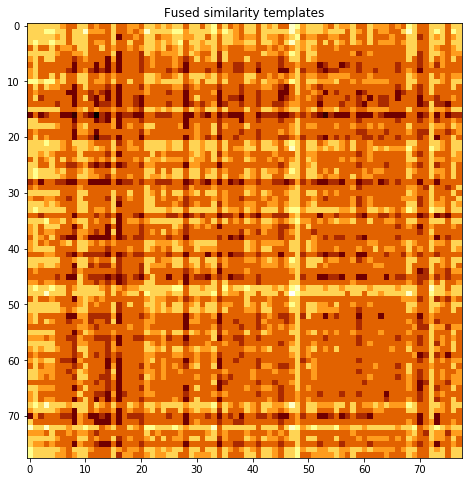

subject 24; gesture 1_0_2


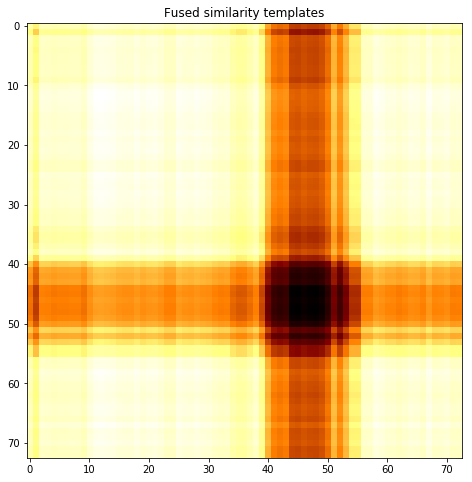

subject 33; gesture 1_1_2


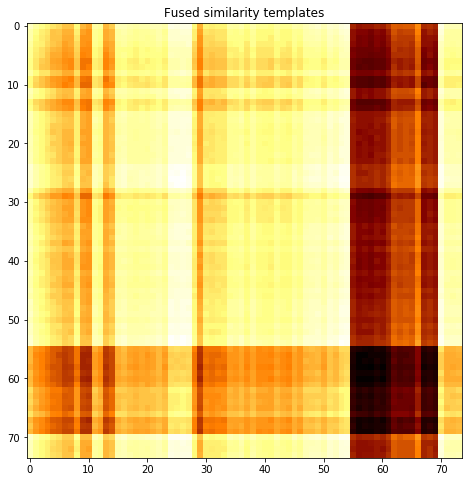

subject 33; gesture 1_1_1


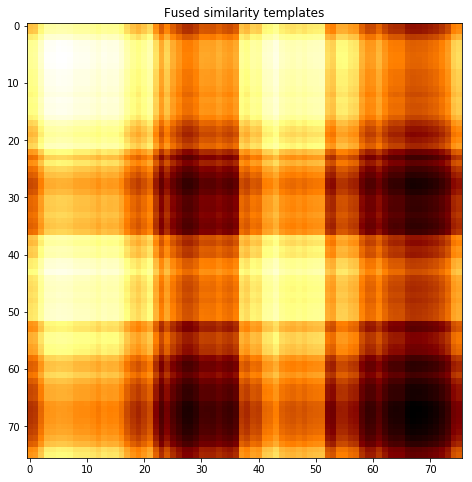

subject 33; gesture 1_0_1


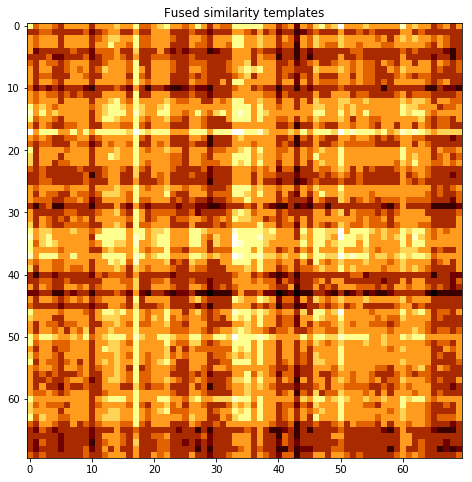

subject 33; gesture 1_0_2


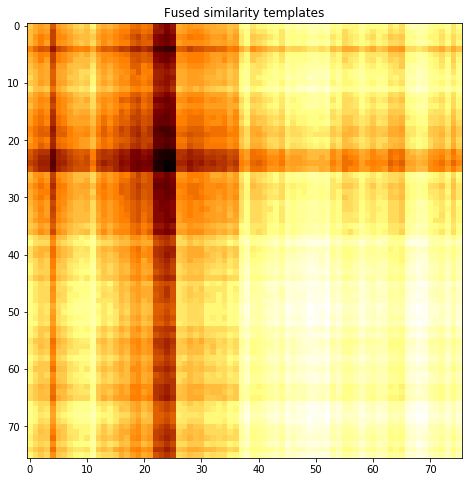

subject 11; gesture 1_1_2


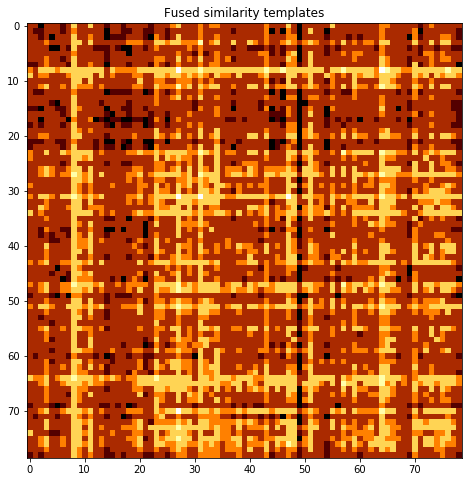

subject 11; gesture 1_1_1


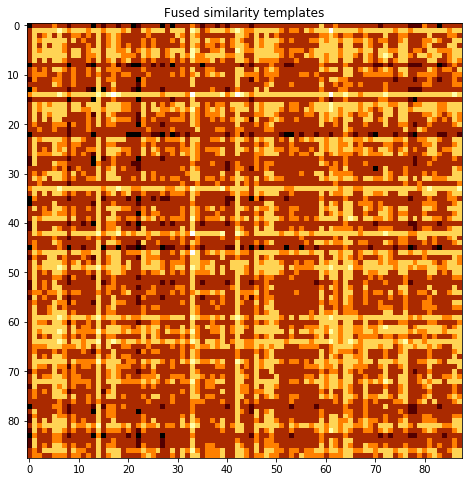

subject 11; gesture 1_0_1


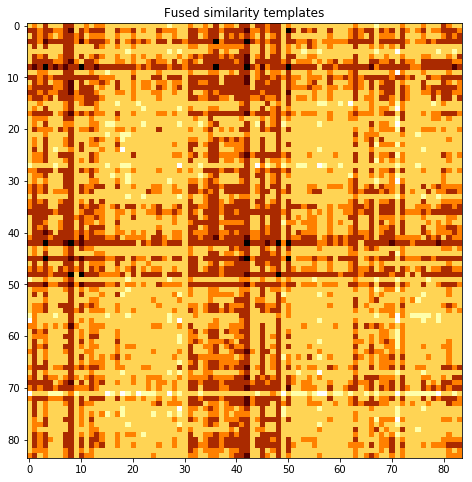

subject 11; gesture 1_0_2


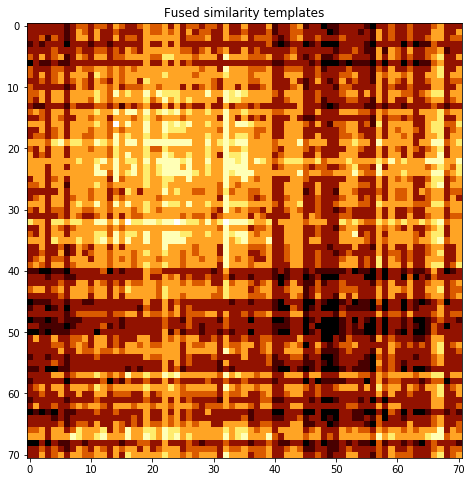

subject 35; gesture 1_1_2


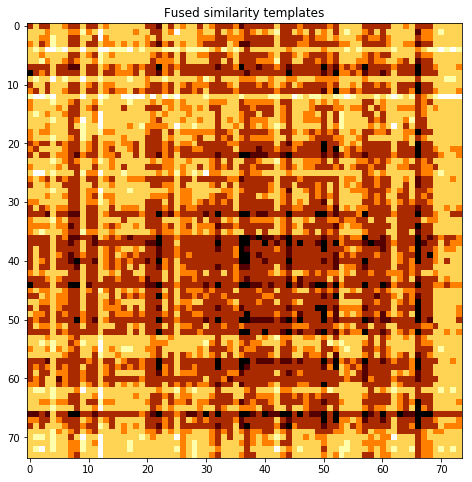

subject 35; gesture 1_1_1


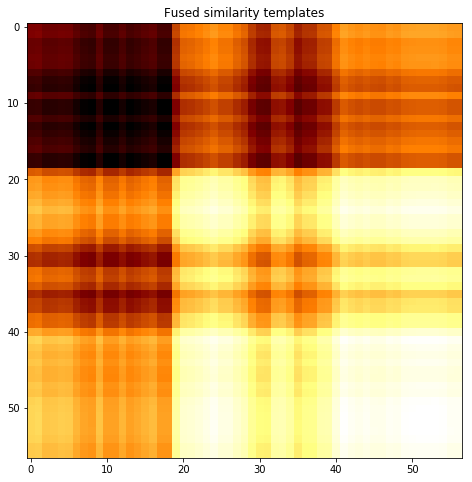

subject 35; gesture 1_0_1


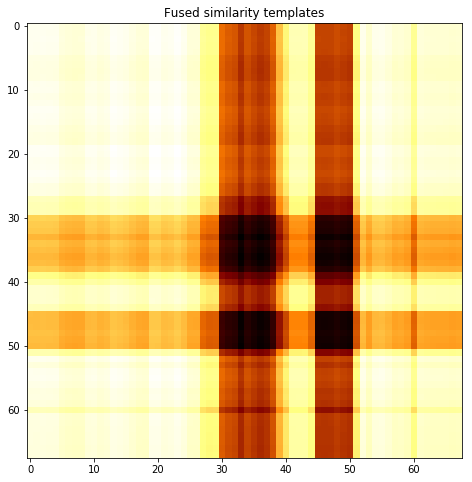

subject 35; gesture 1_0_2


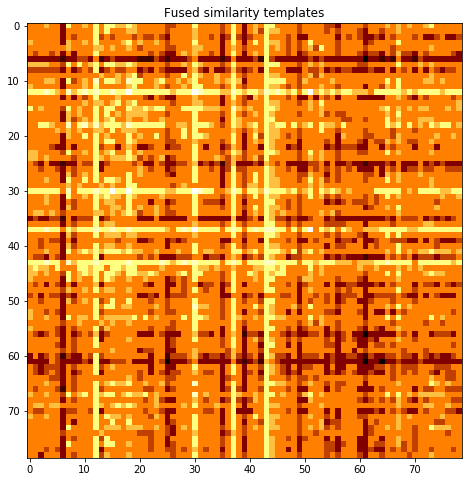

subject 22; gesture 1_1_2


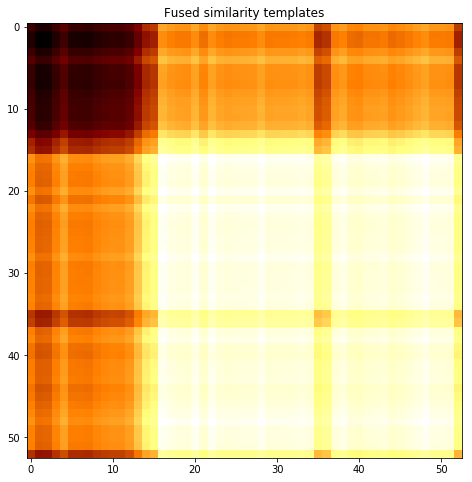

subject 22; gesture 1_1_1


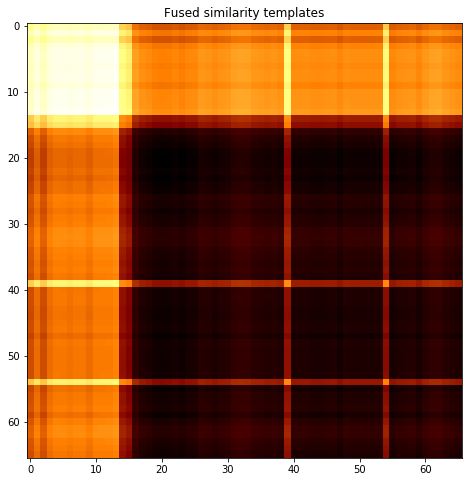

subject 22; gesture 1_0_1


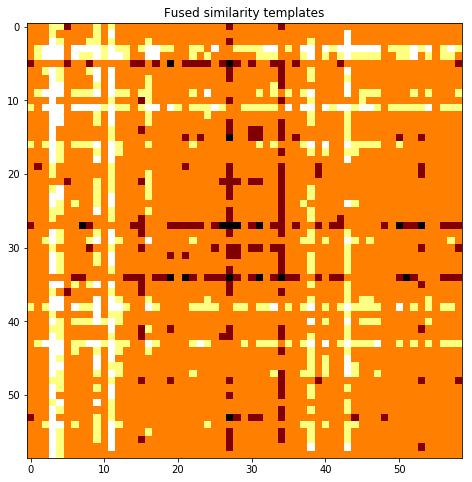

subject 22; gesture 1_0_2


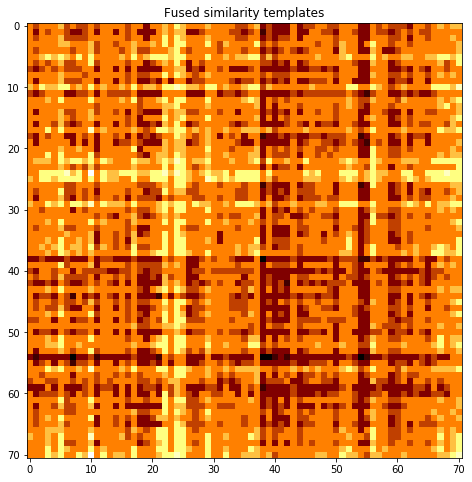

subject 34; gesture 1_1_2


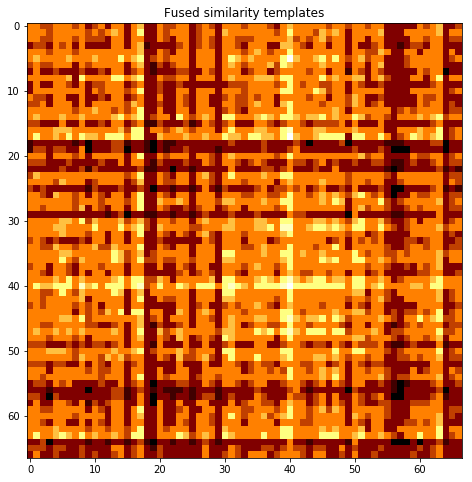

subject 34; gesture 1_1_1


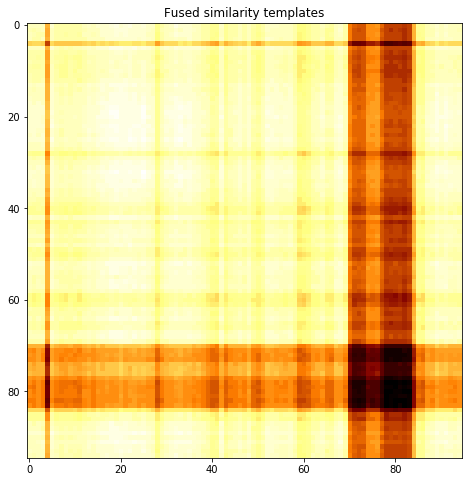

subject 34; gesture 1_0_1


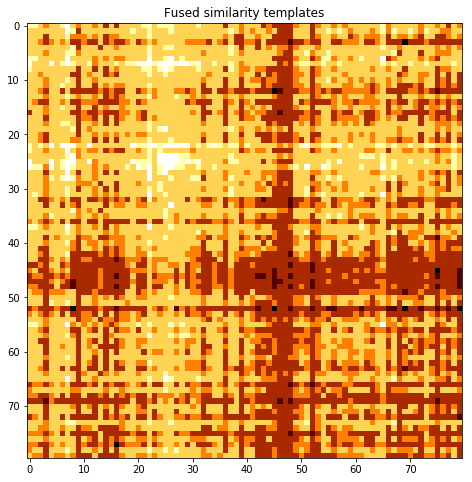

subject 34; gesture 1_0_2


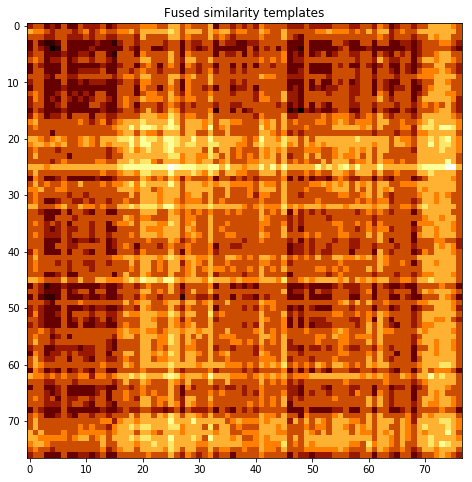

subject 10; gesture 1_1_2


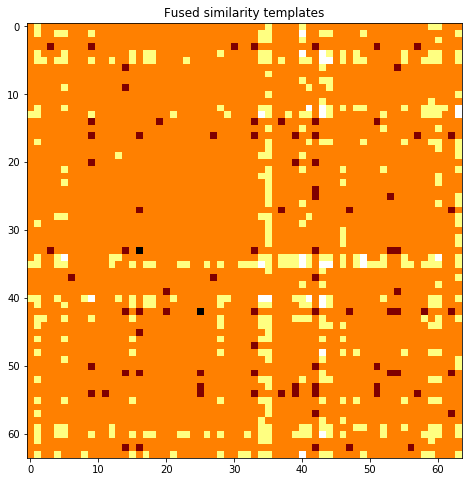

subject 10; gesture 1_1_1


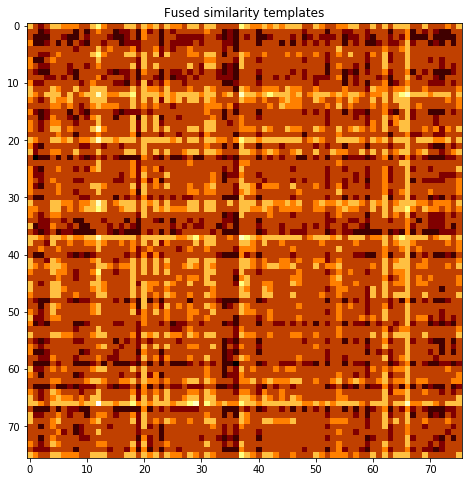

subject 10; gesture 1_0_1


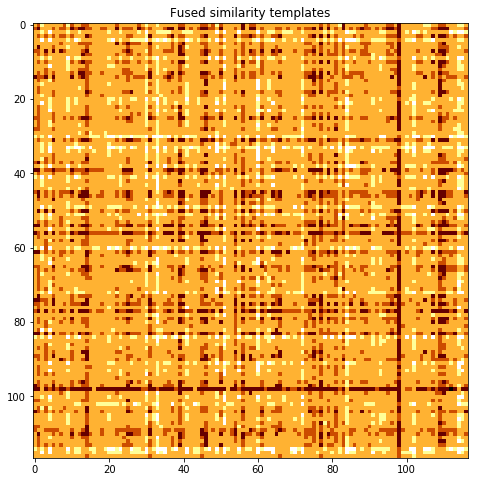

subject 10; gesture 1_0_2


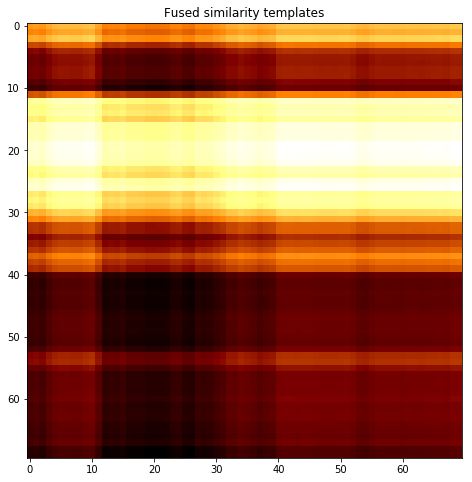

subject 02; gesture 1_1_2


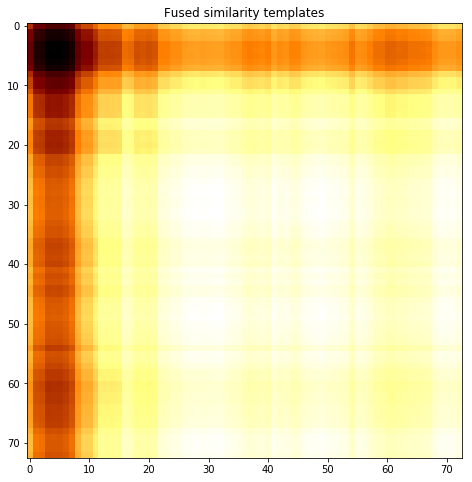

subject 02; gesture 1_1_1


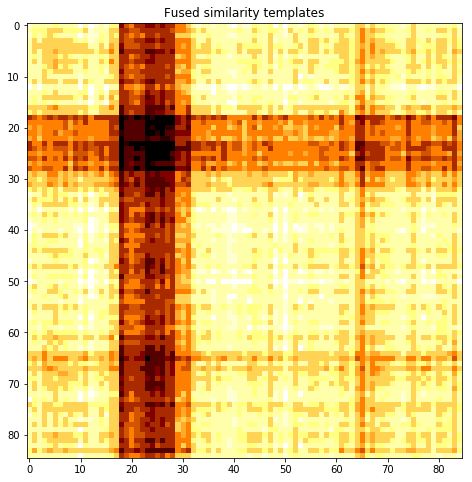

subject 02; gesture 1_0_1


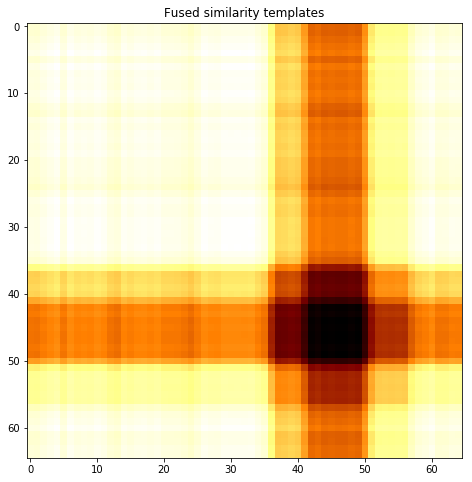

subject 02; gesture 1_0_2


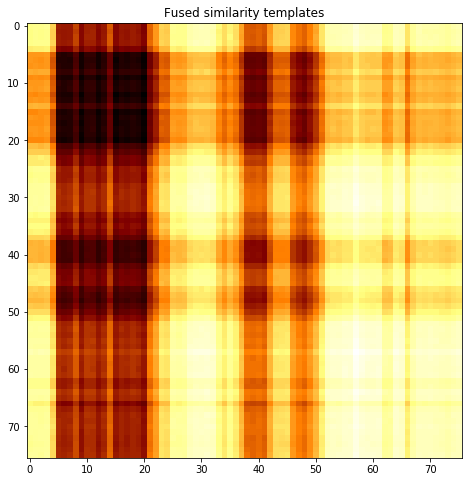

In [3]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        if g[0] != "1": continue # skip gestures not of class 1
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion()
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)


Does each fused ssm provide a realization?

In [4]:
for s, gdict in g1_dict_antag.items():
    print(s)
    for g, a in gdict.items():
        print(f"gesture {g}; avg {a.mean()}; sd {a.std()}")

30
gesture 1_1_2; avg 0.011630769180479922; sd 1.9268514810341013e-18
gesture 1_1_1; avg 0.012082253847198143; sd 2.3063058565353316e-12
gesture 1_0_1; avg 0.010761383123762628; sd 7.265845904771916e-10
gesture 1_0_2; avg 0.013370160253352054; sd 1.3181393996232204e-12
06
gesture 1_1_2; avg 0.0275472083077531; sd 1.3591316716761226e-17
gesture 1_1_1; avg 0.013630325484859967; sd 1.1815030195939522e-15
gesture 1_0_1; avg 0.01496591044967496; sd 1.1339363750390798e-16
gesture 1_0_2; avg 0.018567332816626307; sd 2.7454711111564365e-18
09
gesture 1_1_2; avg 0.01369793473984033; sd 2.375888423560337e-18
gesture 1_1_1; avg 0.015190306317171503; sd 3.396499481580765e-18
gesture 1_0_1; avg 0.012023185802250256; sd 3.1927520111235983e-15
gesture 1_0_2; avg 0.014454077424813836; sd 2.519831400193606e-18
03
gesture 1_1_2; avg 0.013220300490531132; sd 2.881960777648479e-18
gesture 1_1_1; avg 0.018547257696361986; sd 3.0160301246074636e-18
gesture 1_0_1; avg 0.014111405390990048; sd 4.0942582826840

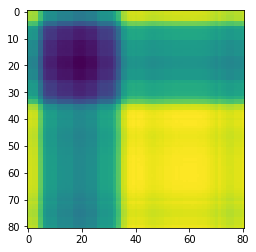

In [5]:
real_tst = g1_dict_antag["15"]["1_1_2"]
plt.imshow(real_tst)
plt.show()

In [6]:
evals, evecs = la.eig(real_tst)
evals = evals.real

In [7]:
pc = evecs[:, :2]

In [8]:
dr = real_tst @ pc
dr = dr.real

In [9]:
import plotly.express as px
import pandas as pd

In [10]:
df = pd.DataFrame(dr)
df.columns = ["f", "s"]

In [11]:
fig = px.scatter(df, x="f", y="s")
fig.show()

---

1_1_2


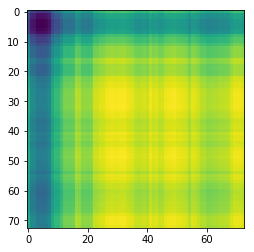

1_1_1


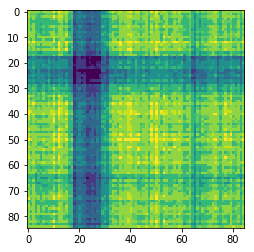

1_0_1


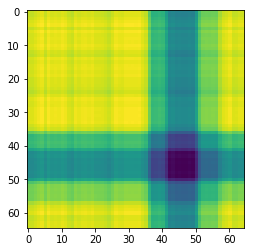

1_0_2


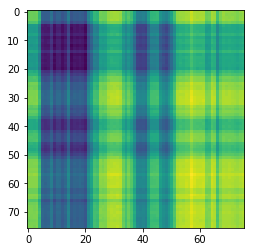

In [12]:
for g, a in g1_dict_antag["02"].items():
    print(g)
    plt.imshow(a)
    plt.show()

1_1_2


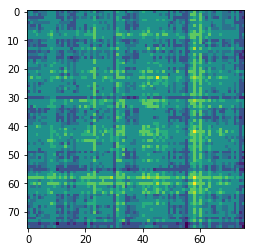

1_1_1


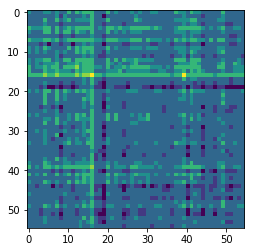

1_0_1


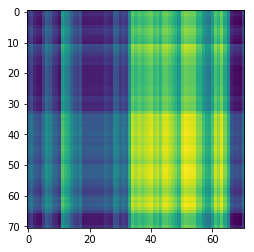

1_0_2


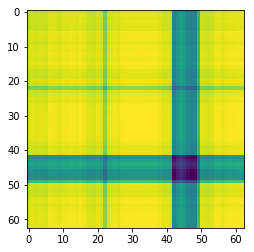

In [13]:
for g, a in g1_dict_antag["03"].items():
    print(g)
    plt.imshow(a)
    plt.show()